# Car Features, Price, and Popularity
## by Robert Bruton

## Preliminary Wrangling and Exploratory Analysis

This dataset is the "Car Features and MSRP" dataset by CooperUnion on Kaggle. This dataset features 16 columns of variables for almost 12,000 rows of observations. The data was originally scraped from Edmunds and Twitter. This dataset can be found at: https://www.kaggle.com/CooperUnion/cardataset 

In [101]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [102]:
# Import csv file of dataset into pandas df

cars = pd.read_csv('car_data.csv')

In [103]:
# Define function to inspect data frames. Prints first few lines, determines size/shape of data frame,
# shows descriptive statistics, shows data types, shows missing or incomplete data, check for duplicate data.

def inspect_df(df):
    print('Header:')
    print('{}'.format(df.head()))
    print()
    print('Shape: {}'.format(df.shape))
    print()
    print('Statistics:')
    print('{}'.format(df.describe()))
    print()
    print('Info:')
    print('{}'.format(df.info()))

In [104]:
# Use inspect_df on cars data frame

inspect_df(cars)

Header:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact  

In [105]:
# Change column headers

cars.columns = ['make', 'model', 'year', 'fuel', 'hp', 'cylinders', 'trans', 'drive', 'doors', 'category', 'vsize', 'body',
               'hwy_mpg', 'city_mpg', 'popularity', 'price']

In [106]:
# Drop market category column

cars = cars.drop(columns = 'category')

In [107]:
# Drop rows with important missing data

cars = cars.dropna()

In [108]:
# Change data types of some columns (wait to set make to category til later)

cars.fuel = cars.fuel.astype('category')
cars.hp = cars.hp.astype('int64')
cars.cylinders = cars.cylinders.astype('category')
cars.trans = cars.trans.astype('category')
cars.drive = cars.drive.astype('category')
cars.doors = cars.doors.astype('category')
cars.vsize = cars.vsize.astype('category')
cars.body = cars.body.astype('category')

In [109]:
# Use inspect_df on cars data frame again

inspect_df(cars)

Header:
  make       model  year                         fuel   hp cylinders   trans  \
0  BMW  1 Series M  2011  premium unleaded (required)  335       6.0  MANUAL   
1  BMW    1 Series  2011  premium unleaded (required)  300       6.0  MANUAL   
2  BMW    1 Series  2011  premium unleaded (required)  300       6.0  MANUAL   
3  BMW    1 Series  2011  premium unleaded (required)  230       6.0  MANUAL   
4  BMW    1 Series  2011  premium unleaded (required)  230       6.0  MANUAL   

              drive doors    vsize         body  hwy_mpg  city_mpg  \
0  rear wheel drive   2.0  Compact        Coupe       26        19   
1  rear wheel drive   2.0  Compact  Convertible       28        19   
2  rear wheel drive   2.0  Compact        Coupe       28        20   
3  rear wheel drive   2.0  Compact        Coupe       28        18   
4  rear wheel drive   2.0  Compact  Convertible       28        18   

   popularity  price  
0        3916  46135  
1        3916  40650  
2        3916  36350 

### What is the structure of your dataset?

After cleaning, there are 11812 rows of observations with 15 columns of variables and no missing values. The variables contain 7 categoricals, 1 string, and 7 integer numerics. The only categorical variable that has an order is the vsize (vehicle size) which contains compact (smallest), midsize, and large (largest).

### What is/are the main feature(s) of interest in your dataset?

I am mostly interested in which features have the strongest correlation with price.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that the price will be strongly affected by hp, size, body style, and make. I hypothesize that make will be the best predictor of price.

## Univariate Exploration

Start by looking at distribution of price

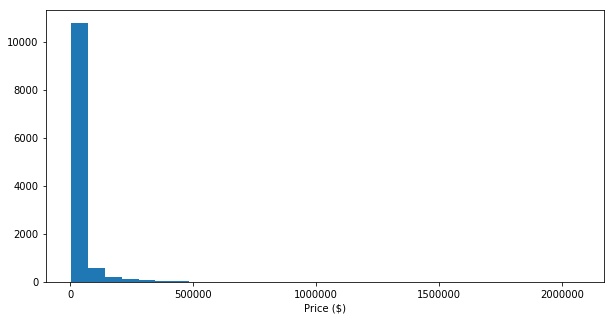

In [110]:
# Histogram of price

plt.figure(figsize=[10, 5])
plt.hist(data = cars, x = 'price', bins = 30)
plt.xlabel('Price ($)');

The data is very skewed due to the max price outlier. Set x axis limit to focus on values under 50,000

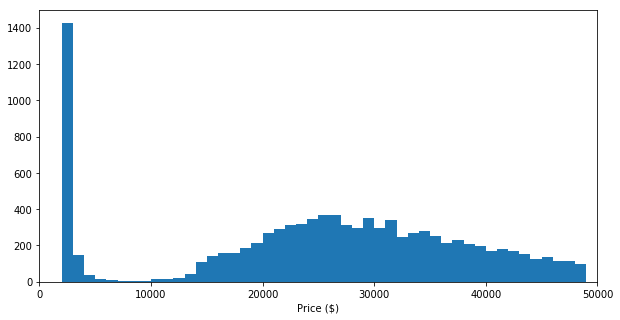

In [111]:
# Histogram of price

bins = np.arange(0, 50000, 1000)
plt.figure(figsize=[10, 5])
plt.hist(data = cars, x = 'price', bins = bins)
plt.xlim(0, 50000)
plt.xlabel('Price ($)');

There are a lot of cars in the 2000 to 4000 range, a couple outliers close to 200,000, and the majority of data falling in a fairly normal distribution between 10,000 and 50,000. Let's look at a box plot of the distribution.

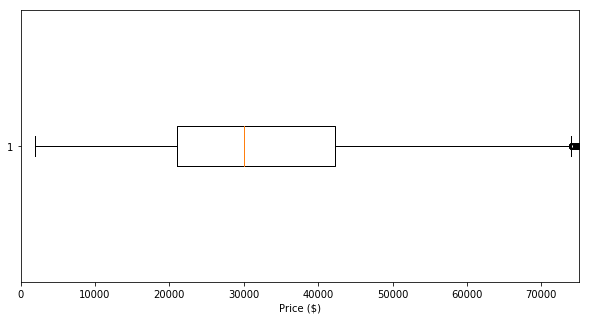

In [112]:
# Box plot of price

plt.figure(figsize=[10, 5])
plt.boxplot(cars.price, vert=False)
plt.xlim(0, 75000)
plt.xlabel('Price ($)');

The median of the price is around 30,000, with half of the data lying between about 20,000 and 40,000 and anything above about 75,000 is an outlier. Now, let's look at the high outliers and the very low values.

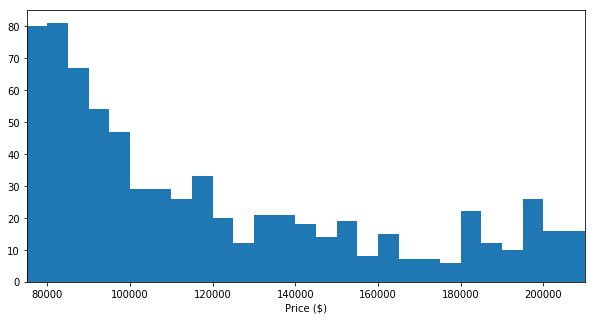

In [113]:
# Select high outlier prices

outliers = cars[cars.price > 75000]

# Histogram of outliers

bins = np.arange(75000, cars.price.max()+5000, 5000)
plt.figure(figsize=[10, 5])
plt.hist(data = cars, x = 'price', bins = bins)
plt.xlim(75000, 210000)
plt.xlabel('Price ($)');

In [114]:
outliers.make.value_counts()

Mercedes-Benz    102
BMW               93
Aston Martin      93
Porsche           93
Cadillac          83
Bentley           74
Ferrari           68
Maserati          54
Lamborghini       52
Audi              49
Land Rover        49
Rolls-Royce       31
Chevrolet         20
Lexus             19
Dodge             18
Maybach           16
Lotus              9
Nissan             8
Volkswagen         6
Acura              5
McLaren            5
Toyota             3
Spyker             3
Bugatti            3
Ford               2
Lincoln            2
Infiniti           1
Name: make, dtype: int64

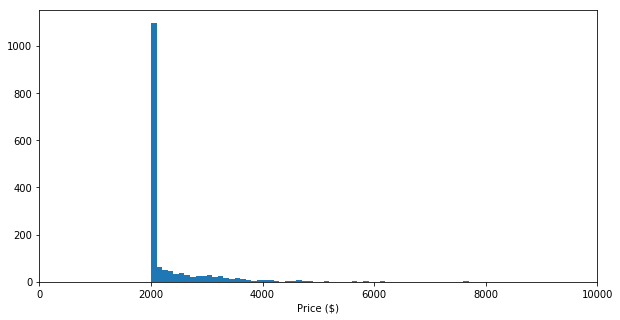

In [115]:
# Select low price values

lows = cars[cars.price < 10000]

# Histogram of low values

bins = np.arange(cars.price.min(), cars.price.max()+100, 100)
plt.figure(figsize=[10, 5])
plt.hist(data = cars, x = 'price', bins = bins)
plt.xlim(0, 10000)
plt.xlabel('Price ($)');

In [116]:
# Select cars priced around $2000

lowest = cars[cars.price < 2100]

# Makes of cars around $2000

lowest.make.value_counts()

Dodge            173
Ford              91
Oldsmobile        81
Chevrolet         80
Volvo             78
Plymouth          71
GMC               55
Pontiac           39
Audi              39
Suzuki            38
Mazda             35
Nissan            34
Toyota            33
Volkswagen        28
Saab              27
Buick             26
Subaru            25
Mitsubishi        23
Chrysler          23
Hyundai           20
Mercedes-Benz     17
Acura             15
Infiniti          12
Honda             10
Cadillac           9
Lincoln            8
Kia                4
Lexus              2
Name: make, dtype: int64

In [117]:
# Drop high price outliers and really cheap cars, then set 'make' to category dtype

cars = cars[cars.price <= 75000]
cars = cars[cars.price > 5000]
cars.make = cars.make.astype('category')

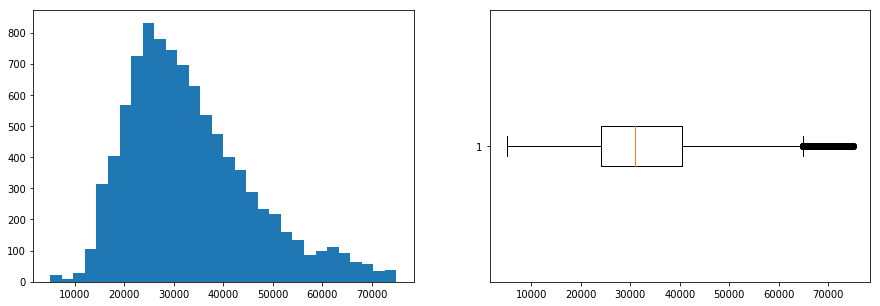

In [118]:
# Plot hist and boxplot of new price distribution

plt.figure(figsize=[15, 5])

plt.subplot(1,2,1)
plt.hist(data=cars, x='price', bins=30)

plt.subplot(1,2,2)
plt.boxplot(cars.price, vert = False);

The high outliers values for price are values above 75,000. Most of these values fall between 75,000 and 100,000, but can be over 200,000 as well. Looking at the makes of these cars shows that most tend to be exotic type cars, many from uncommon makes like Ferrari or Lamborghini, although a few are from manufacturers like Ford and Chevrolet and the most common make for these expensive outliers is Mercedes-Benz.

The very low priced cars (under 10,000) distribution is very skewed with almost all sub 10,000 dollar cars being priced at 2000 dollars. The cars at this lowest price point tend to be old and from more common makes. Interestingly, there are a some cars in this lowest price category that are from the same makes as some cars in the highest price category, including Mercedes-Benz.

For the sake of having a neat dataset for the rest of the analysis, I dropped all entries with price values lower than 5,000 and higher than 75,000.

Next, looking at predictor variables, starting with the categorical variables.

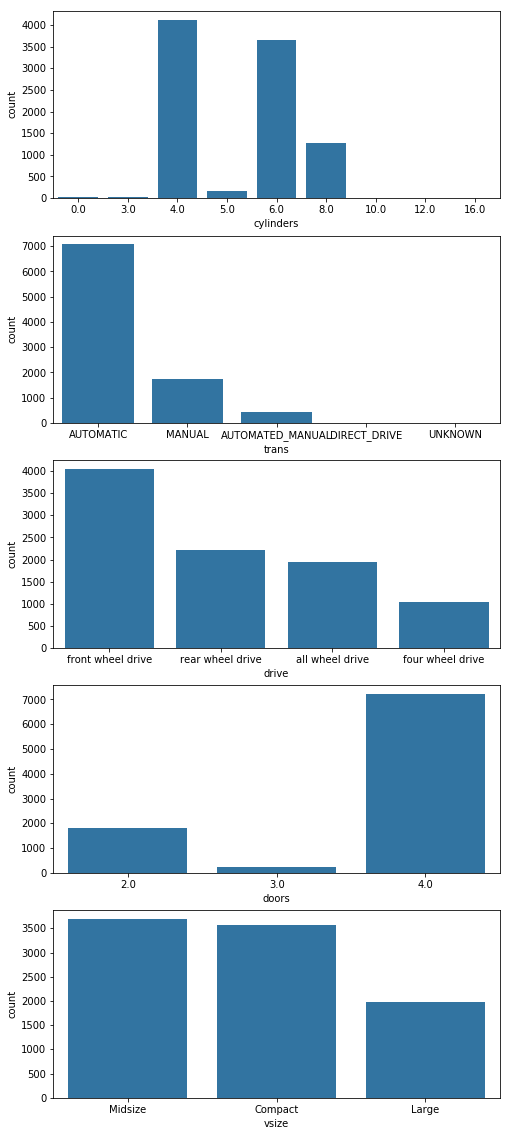

In [119]:
# Bar plots of most categorical variables

fig, ax = plt.subplots(nrows=5, figsize = [8,20])

default_color = sb.color_palette()[0]

sb.countplot(data = cars, x = 'cylinders', color = default_color, ax = ax[0])
sb.countplot(data = cars, x = 'trans', color = default_color, ax = ax[1], order = cars.trans.value_counts().index)
sb.countplot(data = cars, x = 'drive', color = default_color, ax = ax[2], order = cars.drive.value_counts().index)
sb.countplot(data = cars, x = 'doors', color = default_color, ax = ax[3])
sb.countplot(data = cars, x = 'vsize', color = default_color, ax = ax[4], order = cars.vsize.value_counts().index);

The majority of cars in the dataset have 4, 6, or 8 cylider engines with most having automatic transmissions but a decent number having manual transmissions. Very few cars have different numbers of cylinders or different types of transmissions from those. Most cars are 4-door models, with a good number of 2-door and a few 3-door models as well. Front wheel drive is most common, but the distribution of drive types is fairly balanced. Compact is the most common size, with slightly fewer midsize but a decent number of large as well. 

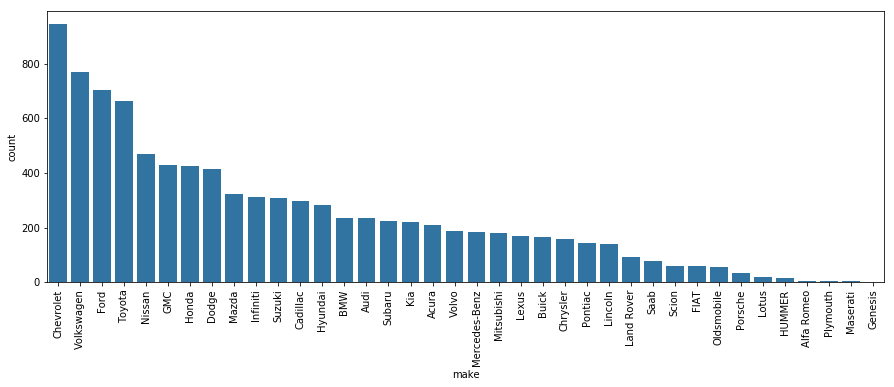

In [120]:
# Bar plot of makes

plt.figure(figsize=[15, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = cars, x = 'make', color = default_color, order = cars.make.value_counts().index)
plt.xticks(rotation=90);

In [121]:
cars.make.value_counts()

Chevrolet        946
Volkswagen       769
Ford             704
Toyota           663
Nissan           468
GMC              430
Honda            424
Dodge            415
Mazda            323
Infiniti         311
Suzuki           307
Cadillac         298
Hyundai          283
BMW              237
Audi             235
Subaru           226
Kia              222
Acura            209
Volvo            189
Mercedes-Benz    185
Mitsubishi       182
Lexus            168
Buick            166
Chrysler         159
Pontiac          145
Lincoln          142
Land Rover        93
Saab              78
Scion             60
FIAT              59
Oldsmobile        57
Porsche           34
Lotus             20
HUMMER            17
Alfa Romeo         5
Plymouth           4
Maserati           4
Genesis            3
Name: make, dtype: int64

There are a large number of options for make in the dataset, but the distribution heavily favors the more common makes (duh). The top 5 most common are Chevrolet, Ford, Volkswagen, Toyota, and Dodge, in that order.

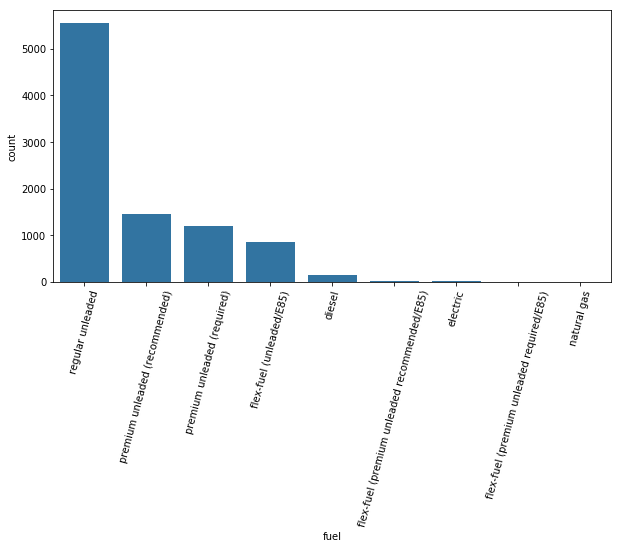

In [122]:
# Bar plot of fuel types

plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = cars, x = 'fuel', color = default_color, order = cars.fuel.value_counts().index)
plt.xticks(rotation=75);

In [123]:
# Combine similar fuel types to reduce number of categories

cars.fuel = cars.fuel.str.split('(', 1).str[0]

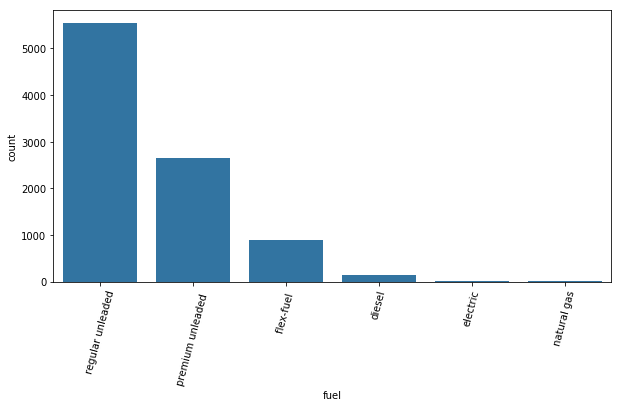

In [124]:
# Bar plot of fuel types

plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = cars, x = 'fuel', color = default_color, order = cars.fuel.value_counts().index)
plt.xticks(rotation=75);

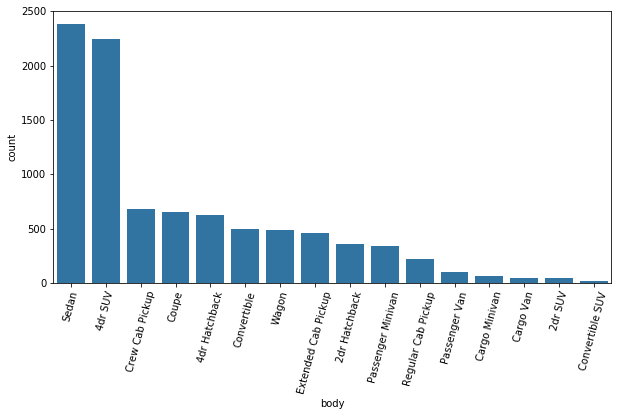

In [125]:
# Bar plot of body styles

plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = cars, x = 'body', color = default_color, order = cars.body.value_counts().index)
plt.xticks(rotation=75);

By far the most common fuel type is regular unleaded with more than triple the count of the next most common. Premium unleaded fuel is the next most common, followed by flex fuel and diesel with alternatives such as electric and natural gas being pretty uncommon. Car body style has quite a few options, but sedans and 4-door SUVs are by far the most common with coupe being the next most common.

In [126]:
# Make new column comb_mpg with average of city and hwy mpg

cars['comb_mpg'] = (cars.hwy_mpg + cars.city_mpg)/2

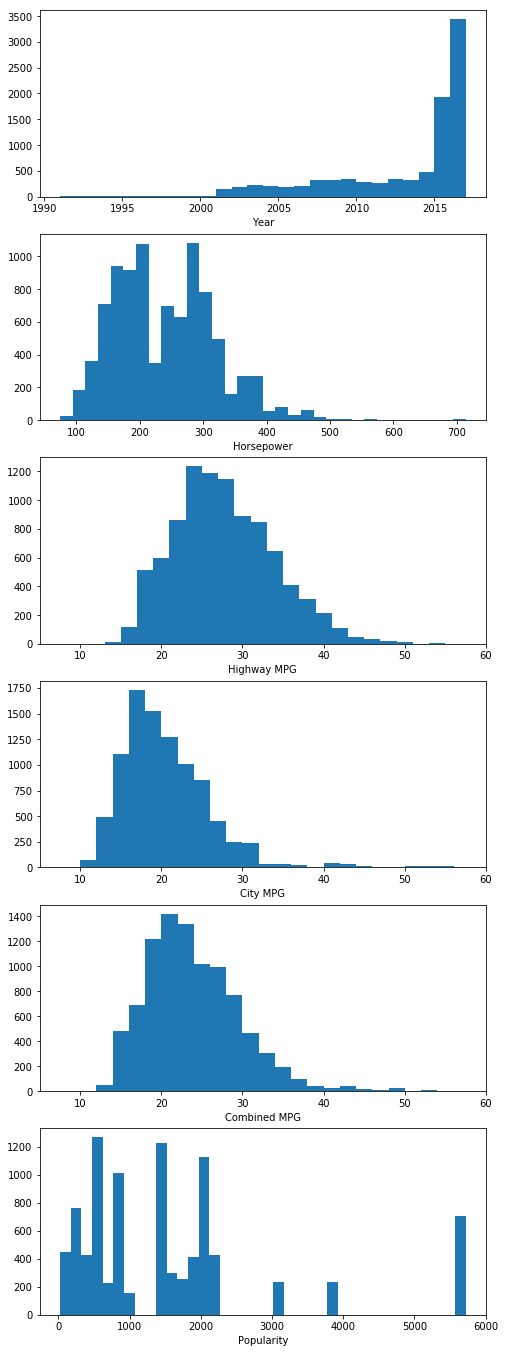

In [127]:
# Histograms of numerical variables other than price

plt.figure(figsize = [8,24])

plt.subplot(6,1,1)
bins = np.arange(cars.year.min(), cars.year.max()+1, 1)
plt.hist(data = cars, x = 'year', bins = bins)
plt.xlabel('Year')

plt.subplot(6,1,2)
bins = np.arange(cars.hp.min(), cars.hp.max()+20, 20)
plt.hist(data = cars, x = 'hp', bins = bins)
plt.xlabel('Horsepower')

plt.subplot(6,1,3)
bins = np.arange(cars.hwy_mpg.min(), cars.hwy_mpg.max()+2, 2)
plt.hist(data = cars, x = 'hwy_mpg', bins = bins)
plt.xlabel('Highway MPG')
plt.xlim(5, 60)

plt.subplot(6,1,4)
bins = np.arange(cars.city_mpg.min(), cars.city_mpg.max()+2, 2)
plt.hist(data = cars, x = 'city_mpg', bins = bins)
plt.xlabel('City MPG')
plt.xlim(5, 60)

plt.subplot(6,1,5)
bins = np.arange(cars.city_mpg.min(), cars.city_mpg.max()+2, 2)
plt.hist(data = cars, x = 'comb_mpg', bins = bins)
plt.xlabel('Combined MPG')
plt.xlim(5, 60)

plt.subplot(6,1,6)
bins = np.arange(cars.popularity.min(), cars.popularity.max()+150, 150)
plt.hist(data = cars, x = 'popularity', bins = bins)
plt.xlabel('Popularity');

The year variable ranges from 1990 to 2017 and is very right skewed with the majority of cars being 2015 or newer. Horespower has a skewed left bimodal distribution with modes a little under 200 and around 300. Both highway and city mpg are left skewed, likely by non-traditional fuel types, with mean highway around 26 and mean city around 18. The popularity variable has a weird distribution. It is left skewed and somewhat bimodal with most data falling in the range of 0-1000 or 1500-2200 and some higher values. There are very few cars older than 2001 models so I am going to drop any cars from 2000 or older.

In [128]:
# Drop older cars and get year count

cars = cars[cars.year > 2000]
cars.year.value_counts().sort_index()

2001     155
2002     193
2003     217
2004     214
2005     192
2006     196
2007     329
2008     324
2009     347
2010     273
2011     255
2012     340
2013     327
2014     470
2015    1923
2016    1918
2017    1524
Name: year, dtype: int64

In [129]:
# Fix some category dtypes to remove empty categories and make ordered and neat

cars.cylinders = cars.cylinders.astype(str)
cars.cylinders = cars.cylinders.str.split('.', 1).str[0]
cyl_cats = CategoricalDtype(categories=['0', '3', '4', '5', '6', '8', '10'], ordered=True)
cars.cylinders = cars.cylinders.astype(cyl_cats)

cars.doors = cars.doors.astype(str)
cars.doors = cars.doors.str.split('.', 1).str[0]
door_cats = CategoricalDtype(categories=['2', '3', '4'], ordered=True)
cars.doors = cars.doors.astype(door_cats)

size_cats = CategoricalDtype(categories=['Compact', 'Midsize', 'Large'], ordered=True)
cars.vsize = cars.vsize.astype(size_cats)

cars.trans = cars.trans.astype(str)
cars.trans = cars.trans.astype('category')

cars.trans = cars.trans.astype(str)
cars.trans = cars.trans.str.lower()
cars.trans = cars.trans.str.replace('_', ' ')
trans_cats = CategoricalDtype(categories=['automatic', 'manual', 'automated manual', 'direct drive'], ordered=True)
cars.trans = cars.trans.astype(trans_cats)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The price variable had a wide range, with some values as low as 2,000 and some over 200,000. There are a lot of cars priced at the minimum point of 2,000, as well as a good number priced above 75,000 that are considered outliers. Ignoring the high outliers and those priced at the minimum, the rest of the prices are somewhat normally distributed with a median price of about 30,000 dollars. No transformations were needed for any variables. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The high number of cars priced at the minimum is a bit unusual and would cause some strange distributions for the rest of the analysis so these have been dropped for neatness. The price values over 75,000 are outliers and have been deleted in the interest of keeping things neat as well. The dataset was also cleaned a little for quality issues of missing data points by removing any entries with missing data in any columns considered important. The data was also cleaned by changing the data types of the columns to more appropriate types.

## Bivariate Exploration

Start with the correlations between numeric variables.

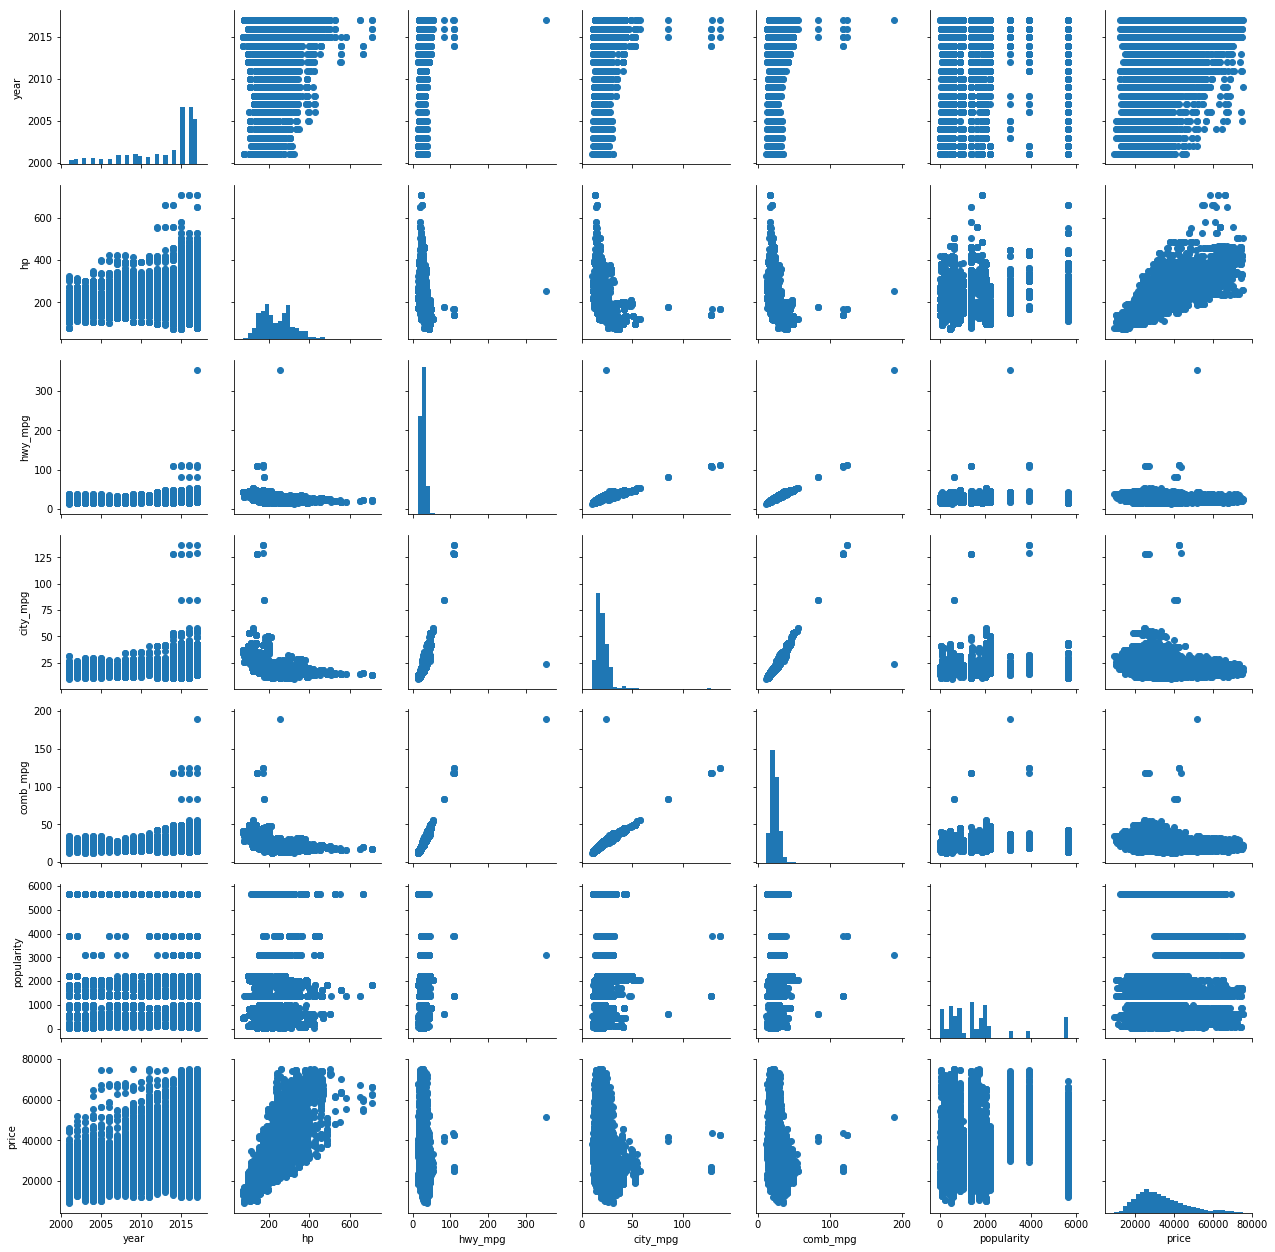

In [130]:
# Plot matrix of numeric variables

num_vars = ['year', 'hp', 'hwy_mpg', 'city_mpg', 'comb_mpg', 'popularity', 'price']

g = sb.PairGrid(data = cars, vars = num_vars)
g = g.map_diag(plt.hist, bins = 30)
g.map_offdiag(plt.scatter);

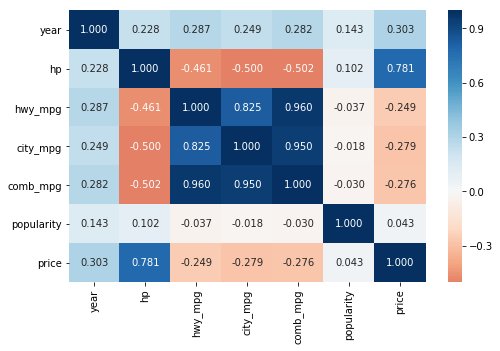

In [131]:
# correlation plot for numeric variables

plt.figure(figsize = [8, 5])
sb.heatmap(cars[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'RdBu', center = 0);

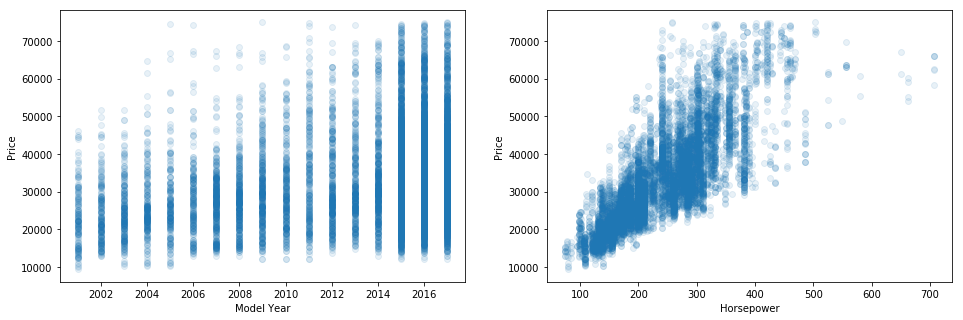

In [132]:
# Plot price vs horsepower and model year

plt.figure(figsize = [16, 5])

plt.subplot(1,2,1)
plt.scatter(data=cars, x='year', y='price', alpha = 0.1)
plt.xlabel('Model Year')
plt.ylabel('Price')

plt.subplot(1,2,2)
plt.scatter(data=cars, x='hp', y='price', alpha = 0.1)
plt.xlabel('Horsepower')
plt.ylabel('Price');

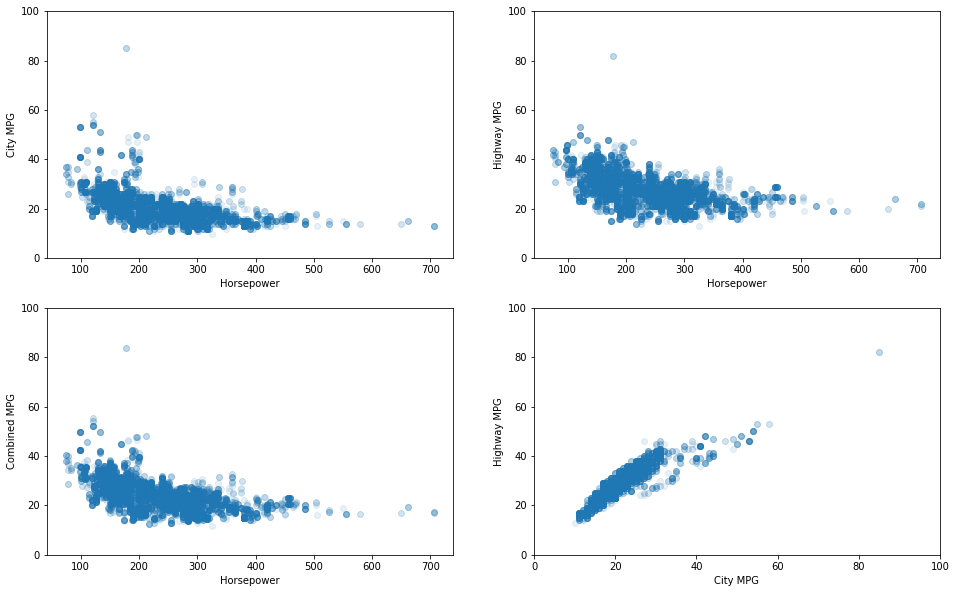

In [133]:
# Plot mileage vs mileage and horsepower

plt.figure(figsize = [16, 10])

plt.subplot(2,2,1)
plt.scatter(data=cars, x='hp', y='city_mpg', alpha = 0.1)
plt.xlabel('Horsepower')
plt.ylabel('City MPG')
plt.ylim(0, 100)

plt.subplot(2,2,2)
plt.scatter(data=cars, x='hp', y='hwy_mpg', alpha = 0.1)
plt.xlabel('Horsepower')
plt.ylabel('Highway MPG')
plt.ylim(0, 100)

plt.subplot(2,2,3)
plt.scatter(data=cars, x='hp', y='comb_mpg', alpha = 0.1)
plt.xlabel('Horsepower')
plt.ylabel('Combined MPG')
plt.ylim(0, 100)

plt.subplot(2,2,4)
plt.scatter(data=cars, x='city_mpg', y='hwy_mpg', alpha = 0.1)
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.xlim(0, 100)
plt.ylim(0, 100);

The city and highway gas mileage have a strong correlation. The price is correlated most strongly with horsepower. Both city and highway gas mileage have inverse correlations with horsepower.

Now lets try out log scaling on the x-axis for all variables except year.

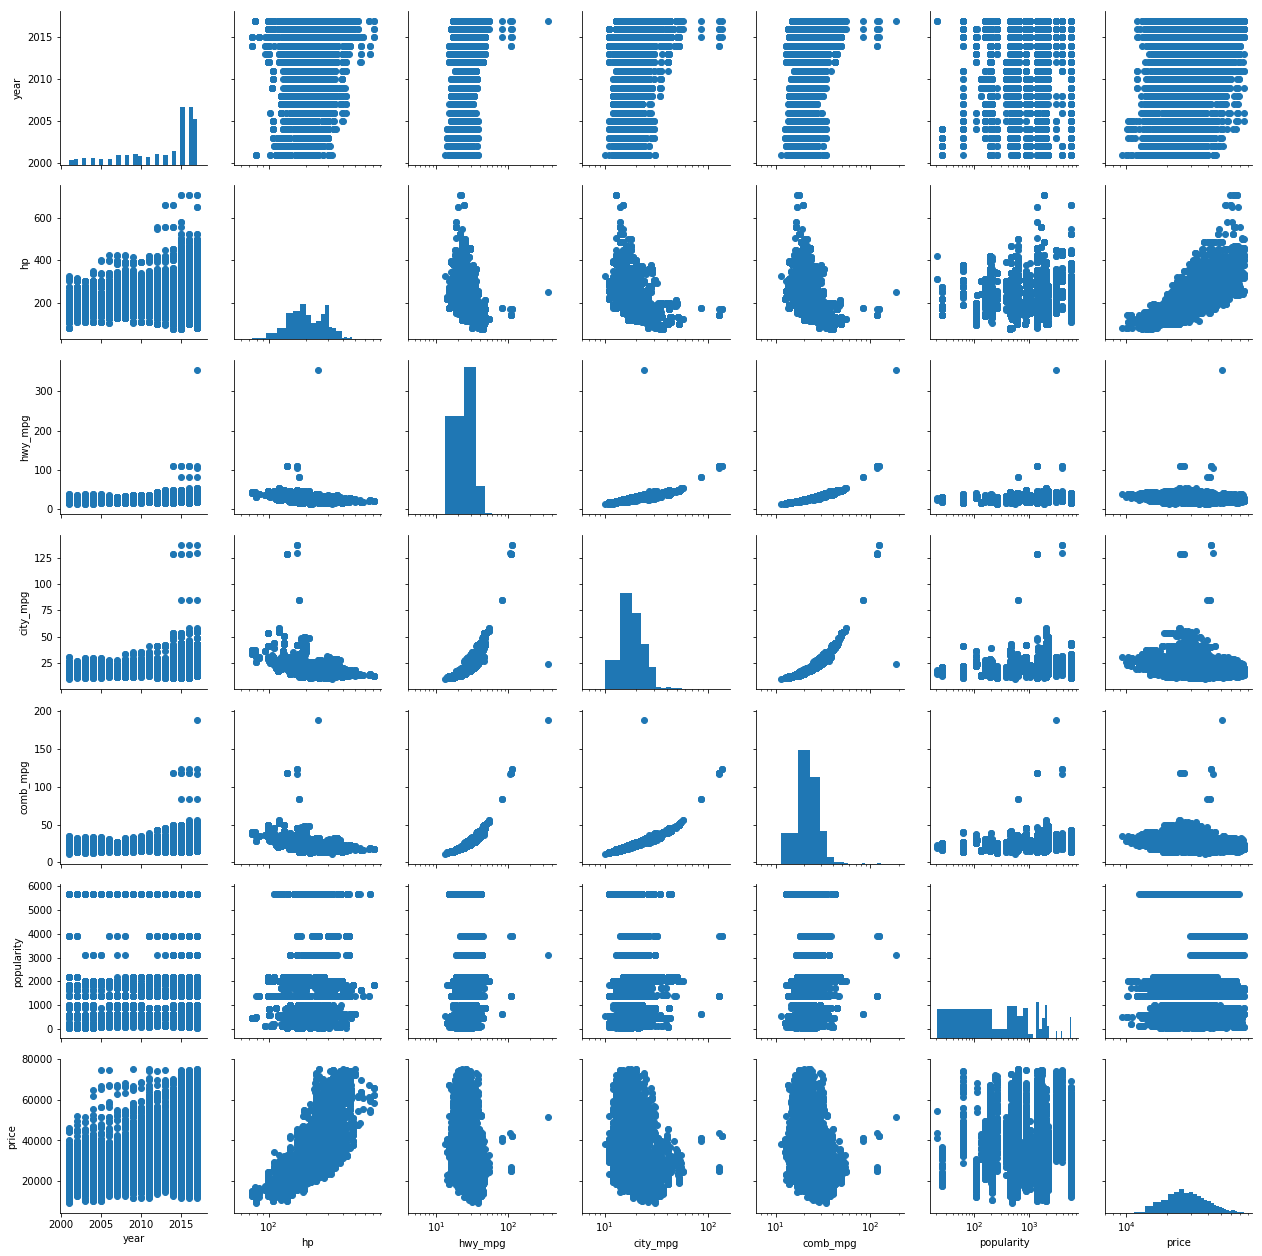

In [134]:
# Plot matrix of numeric variables with log scale on x-axis

g = sb.PairGrid(data = cars, vars = num_vars)
g = g.map_diag(plt.hist, bins = 30)
g.map_offdiag(plt.scatter)
g.fig.get_axes()[1].set_xscale('log')
g.fig.get_axes()[2].set_xscale('log')
g.fig.get_axes()[3].set_xscale('log')
g.fig.get_axes()[4].set_xscale('log')
g.fig.get_axes()[5].set_xscale('log')
g.fig.get_axes()[6].set_xscale('log');

In [135]:
# Make columns for logs of numeric variables and list of all numeric and log variables

cars['log_hp'] = np.log10(cars.hp)
cars['log_hwy_mpg'] = np.log10(cars.hwy_mpg)
cars['log_city_mpg'] = np.log10(cars.city_mpg)
cars['log_comb_mpg'] = np.log10(cars.comb_mpg)
cars['log_popularity'] = np.log10(cars.popularity)
cars['log_price'] = np.log10(cars.price)

num_log = ['hp', 'hwy_mpg', 'city_mpg', 'comb_mpg', 'popularity', 'price', 'year', 'log_hp', 'log_hwy_mpg', 'log_city_mpg',
           'log_comb_mpg', 'log_popularity', 'log_price']

In [136]:
# Make correlation coefficient matrix of numeric and log variables and make dataframe with numeric vs log corrcoefs

cc_array = np.corrcoef(x=cars[num_log], rowvar=False)

cc = pd.DataFrame(data=cc_array[0:,0:], index=[num_log], columns=[num_log])

cc = cc.iloc[0:7, 7:]

cc

,log_hp,log_hwy_mpg,log_city_mpg,log_comb_mpg,log_popularity,log_price
hp,0.976915,-0.527843,-0.598690,-0.566706,0.053667,0.796828
hwy_mpg,-0.489953,0.911424,0.840712,0.903046,0.031500,-0.276951
city_mpg,-0.536885,0.825220,0.925119,0.886579,0.050693,-0.301696
comb_mpg,-0.535993,0.911557,0.921623,0.937156,0.042432,-0.302096
popularity,0.097501,-0.065730,-0.051386,-0.059086,0.836066,0.052226
price,0.775966,-0.286041,-0.340539,-0.313490,-0.027266,0.974372
year,0.216505,0.340098,0.304940,0.328619,0.215843,0.325805


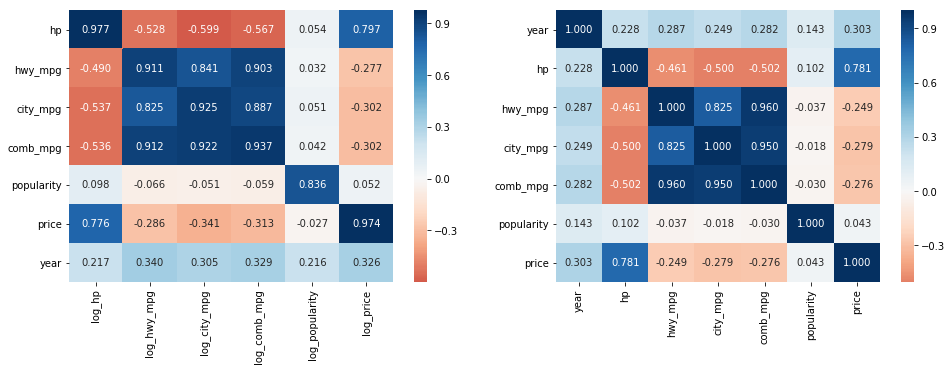

In [137]:
# Make heatmap of numeric vs log correlation coefficients

plt.figure(figsize = [16, 5])

plt.subplot(1,2,1)
sb.heatmap(cc, annot = True, fmt = '.3f', cmap = 'RdBu', center = 0)
plt.ylabel('')
plt.xlabel('')

plt.subplot(1,2,2)
sb.heatmap(cars[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'RdBu', center = 0);

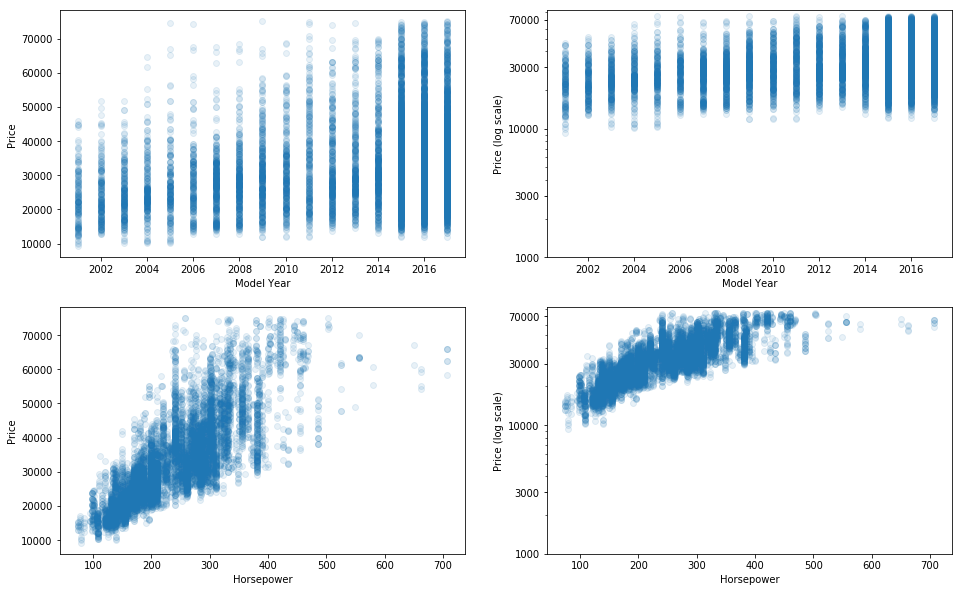

In [138]:
# Plot model year vs price and log price

plt.figure(figsize = [16, 10])

plt.subplot(2,2,1)
plt.scatter(data=cars, x='year', y='price', alpha = 0.1)
plt.xlabel('Model Year')
plt.ylabel('Price')

plt.subplot(2,2,2)
plt.scatter(data=cars, x='year', y='price', alpha = 0.1)
plt.yscale('log')
plt.yticks([1000, 3000, 10000, 30000, 70000], [1000, 3000, 10000, 30000, 70000])
plt.xlabel('Model Year')
plt.ylabel('Price (log scale)')

plt.subplot(2,2,3)
plt.scatter(data=cars, x='hp', y='price', alpha = 0.1)
plt.xlabel('Horsepower')
plt.ylabel('Price')

plt.subplot(2,2,4)
plt.scatter(data=cars, x='hp', y='price', alpha = 0.1)
plt.yscale('log')
plt.yticks([1000, 3000, 10000, 30000, 70000], [1000, 3000, 10000, 30000, 70000])
plt.xlabel('Horsepower')
plt.ylabel('Price (log scale)');

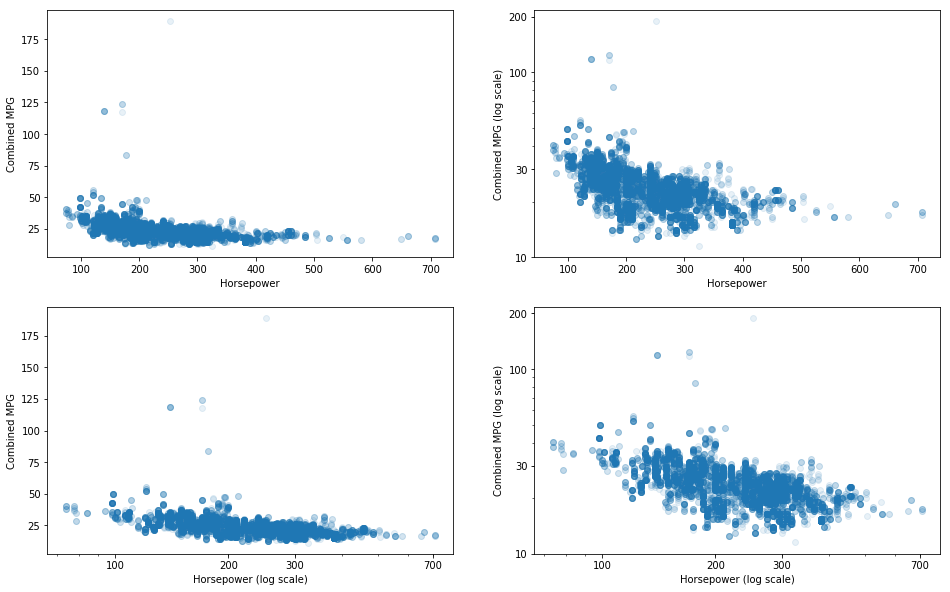

In [139]:
# Plot model year vs price and log price

plt.figure(figsize = [16, 10])

plt.subplot(2,2,1)
plt.scatter(data=cars, x='hp', y='comb_mpg', alpha = 0.1)
plt.xlabel('Horsepower')
plt.ylabel('Combined MPG')

plt.subplot(2,2,2)
plt.scatter(data=cars, x='hp', y='comb_mpg', alpha = 0.1)
plt.yscale('log')
plt.yticks([10, 30, 100, 200], [10, 30, 100, 200])
plt.xlabel('Horsepower')
plt.ylabel('Combined MPG (log scale)')

plt.subplot(2,2,3)
plt.scatter(data=cars, x='hp', y='comb_mpg', alpha = 0.1)
plt.xscale('log')
plt.xticks([100, 200, 300, 700], [100, 200, 300, 700])
plt.xlabel('Horsepower (log scale)')
plt.ylabel('Combined MPG')

plt.subplot(2,2,4)
plt.scatter(data=cars, x='hp', y='comb_mpg', alpha = 0.1)
plt.yscale('log')
plt.yticks([10, 30, 100, 200], [10, 30, 100, 200])
plt.xscale('log')
plt.xticks([100, 200, 300, 700], [100, 200, 300, 700])
plt.xlabel('Horsepower (log scale)')
plt.ylabel('Combined MPG (log scale)');

Doing a log transform of the horsepower slightly incresed the strength of the correlation with gas mileage. Doing a log transform of price slightly increased the strength of the correlation with year and horsepower. Log transforms did not improve any other correlations and those it did improve were insignificant improvements.

Next, looking at the categorical variables and their relationships with the price variable.

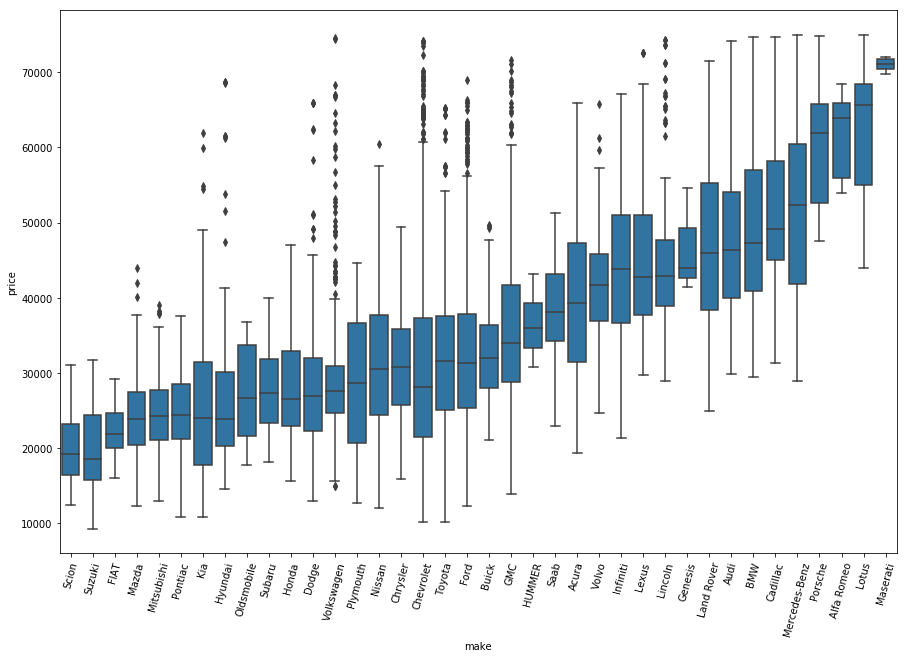

In [140]:
# Box plot of price vs make ordered by mean

order = cars.groupby('make')['price'].mean().sort_values(ascending=True).index

plt.figure(figsize = [15, 10])

sb.boxplot(data = cars, x = 'make', y = 'price', color = default_color,  order = order)
plt.xticks(rotation = 75);

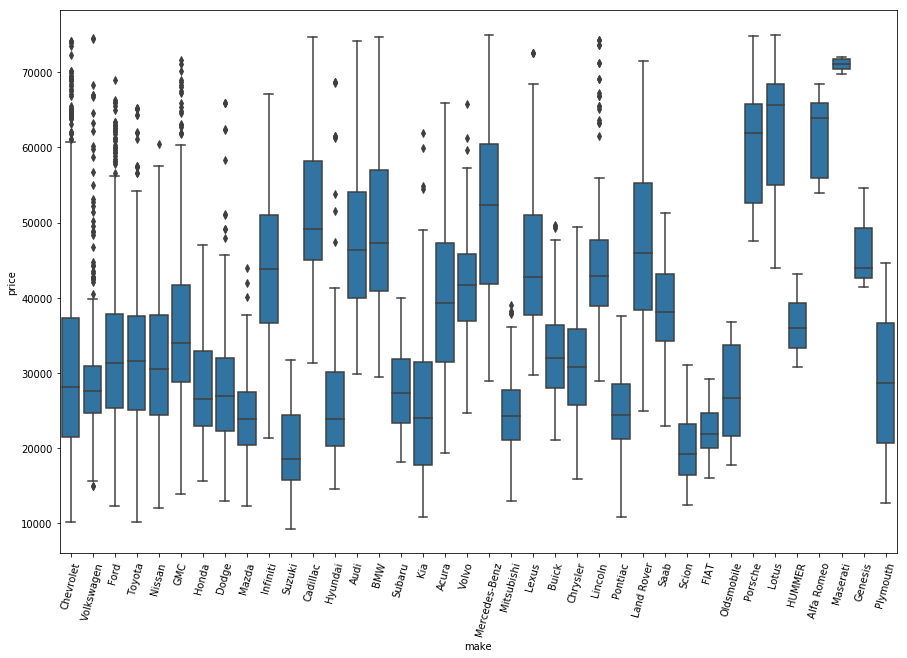

In [141]:
# Box plot of price vs make ordered by count

order = cars.make.value_counts().sort_values(ascending=False).index

plt.figure(figsize = [15, 10])

sb.boxplot(data = cars, x = 'make', y = 'price', color = default_color,  order = order)
plt.xticks(rotation = 75);

Many of the makes have rather large price ranges, some (with outliers included) span the entire dataset price range. There are also some makes that have very small price ranges, some on the high end some on the low end. The top 9 most common makes all have means on the lower end of the price range, while some of the least common makes have means on the very high end of the overall range. Overall, it does seem that make is fairly well correlated with price.

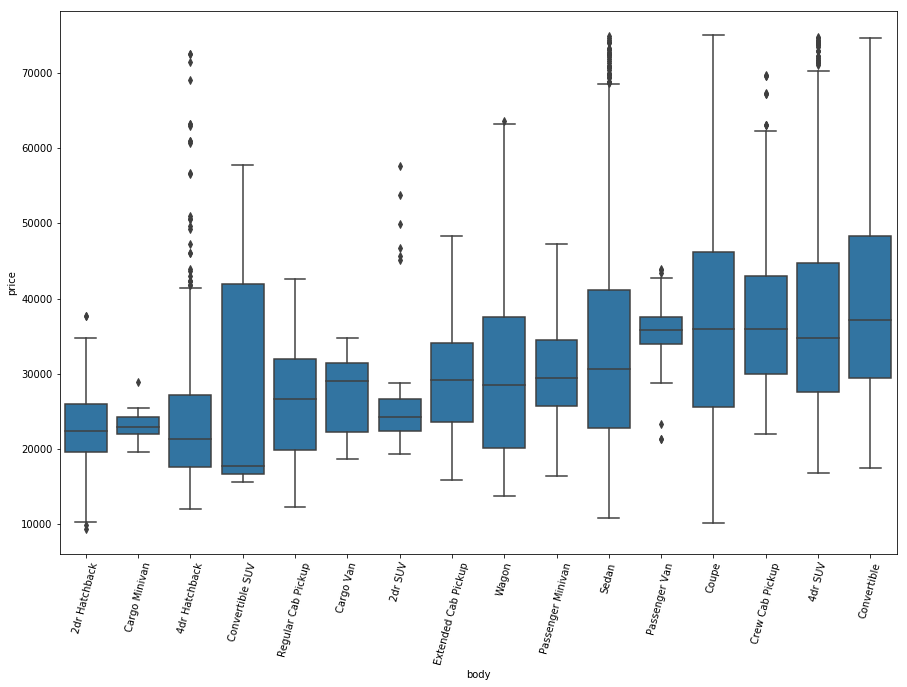

In [142]:
# Box plot of price vs body style orderd by mean

order = cars.groupby('body')['price'].mean().sort_values(ascending=True).index

plt.figure(figsize = [15, 10])

sb.boxplot(data = cars, x = 'body', y = 'price', color = default_color,  order = order)
plt.xticks(rotation = 75);

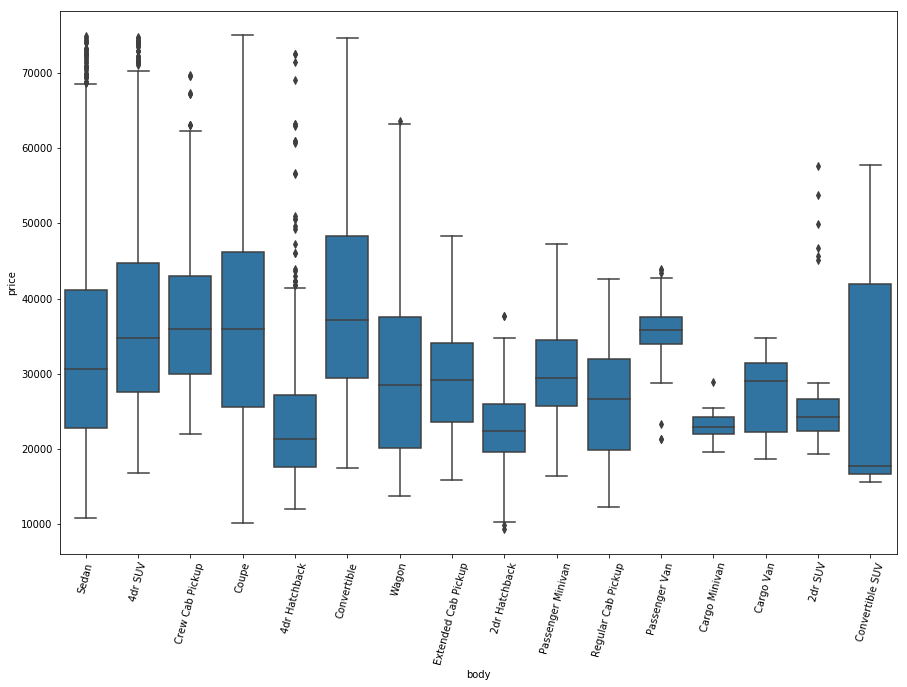

In [143]:
# Box plot of price vs body style orderd by count

order = cars.body.value_counts().sort_values(ascending=False).index

plt.figure(figsize = [15, 10])

sb.boxplot(data = cars, x = 'body', y = 'price', color = default_color,  order = order)
plt.xticks(rotation = 75);

Many of the body types have large price ranges, although some have smaller ranges. The more common body styles tend to have the largest range, whereas the less common body styles tend to have a small range. For the more common styles, body is not a good predictor of price due to the large ranges. However, with the less common styles, the body type will actually be a very good predictor of price.

C:\Users\rbruton\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


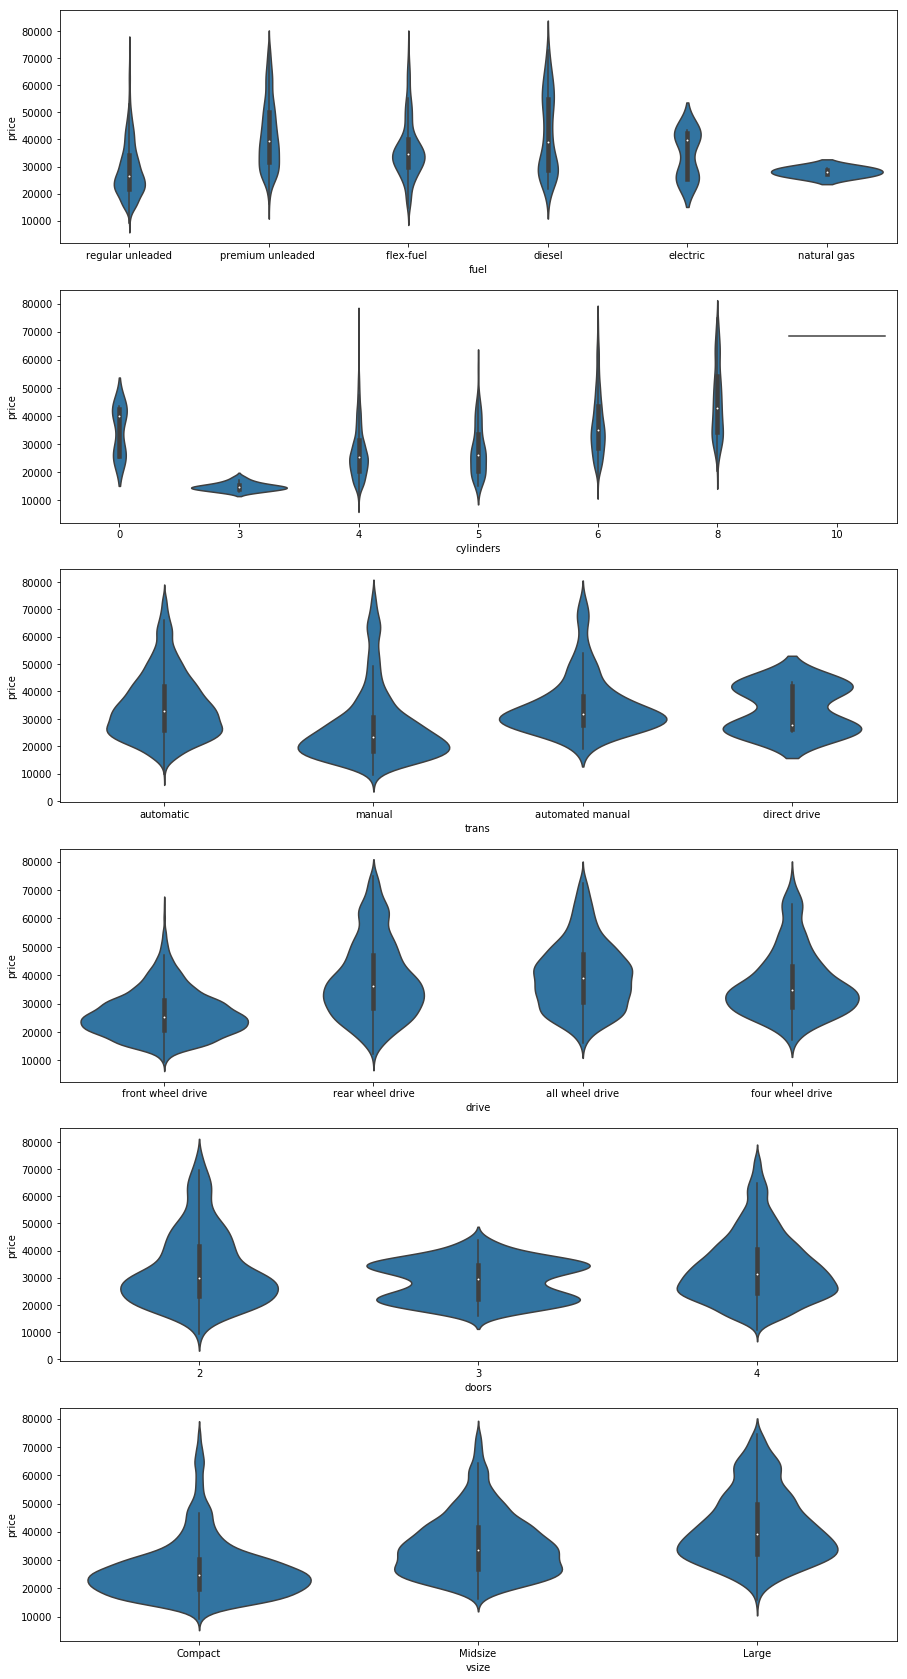

In [144]:
# Violin plots of other categorical variables vs price

fig, ax = plt.subplots(nrows=6, figsize = [15,30])

default_color = sb.color_palette()[0]

sb.violinplot(data = cars, x = 'fuel', y = 'price', color = default_color, ax = ax[0], order = cars.fuel.value_counts().index)
sb.violinplot(data = cars, x = 'cylinders', y = 'price', color = default_color, ax = ax[1])
sb.violinplot(data = cars, x = 'trans', y = 'price', color = default_color, ax = ax[2])
sb.violinplot(data = cars, x = 'drive', y = 'price', color = default_color, ax = ax[3], order = cars.drive.value_counts().index)
sb.violinplot(data = cars, x = 'doors', y = 'price', color = default_color, ax = ax[4])
sb.violinplot(data = cars, x = 'vsize', y = 'price', color = default_color, ax = ax[5]);

Fuel type seems that it may have some value as a predictor of price. Most fuel types have fairly large price ranges, but there does seem to be a trend that cars that take regular unleaded fuel are the cheapest. The distribution of price for diesel fuel type is pretty evenly distributed over the whole range, while the least common types (electric and natural gas) have very small price ranges. Most fuel types seem to have a right skewed distribution of price.

The price range for most engine cylinder categories is large, although there is a trend for the mean to increase with more cylinders among the most common categories (4, 6, and 8). All the cars with 0 cylinders correspond with the electric fuel type. After dropping the high price outliers, there are very few cars with more than 8 cylinders.

Transmission types seem to have pretty wide price ranges, although there is a pretty clear trend. Manual transmissions have lower pricing than automatics, and automated manuals are unlikely to be low priced. Direct drive transmission type corresponds with all the electric fuel type vehicles. All the categories associated with electric vehicles (electric fuel, 0 cylinders, direct drive transmission) have very similar ranges and bimodal distributions since they mostly contain the same set of vehicles.

Drive type definitely seems to have a correlation with price. Front wheel drive, which is the most common, is also the cheapest. Rear wheel and four wheel drive are more mid priced, while all wheel drive vehicles tend to have the highest prices, although there is not a huge difference between the latter 3 categories. The price ranges for all of these are pretty large, but the means and distrubutions follow the stated trend.

Number of doors does not seem to have much correlation with price.

Price distribution by vehicle size has large ranges for all categories, but there seems to be a trend for increasing vehicle size to correspond with increasing price in general.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The price ranges for most other features tends to be quite large and therefore those features are not likely to be of great use for predicting price. There are a few variables that do seem to have correlations with price though and may be very useful as predictors. The numeric variable most strongly correlated with price is horsepower. Model year also seems to have some correlation to price, but it is not a very strong relationship. Make is strongly correlated with price for some makes (usually the less common makes), but not very correlated at all for other makes (especially the very popular makes). Some body types are strongly related to price, but others do not seem related at all. The categorical variables fuel type, cylinders, transmission, drive, and size all seem to have some correlation with price, but for most of these the ranges are so large that they may not be particularly useful as predictors.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is a correlation between highway and city fuel mileage. There is also an inverse correlation between the fuel mileage and the horsepower. Electric fuel type, 0 cylinders, and direct drive transmission type all have nearly the same price range and distribution since they are all made up of the same subset of cars.

## Multivariate Exploration

First, plotting 2d histogram heatmaps of the price vs horsepower for each production year.

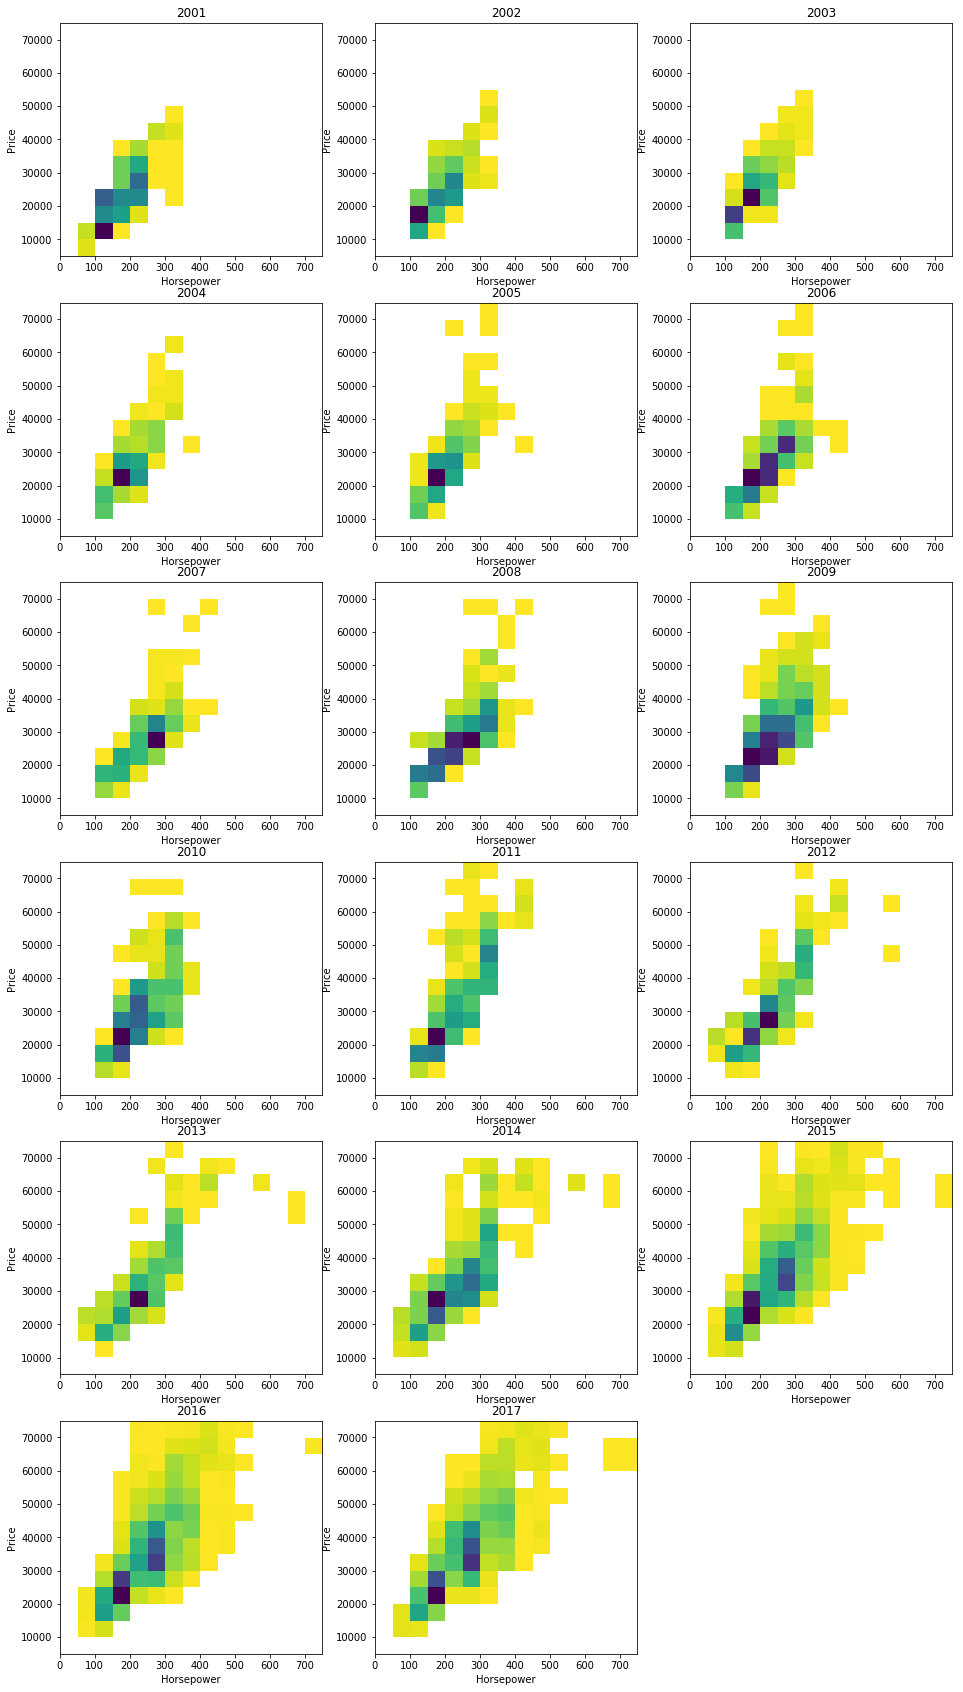

In [145]:
# Heatmaps for price vs hp by year

years = np.arange(2001, 2018, 1)
xbins = np.arange(0, 800, 50)
ybins = np.arange(5000, 80000, 5000)

plt.figure(figsize = [16, 30])
n=1
for y in years:
    ax = plt.subplot(6,3,n)
    ax.set_title(y)
    plt.hist2d(data = cars[cars.year == y], x='hp', y='price', cmap = 'viridis_r', cmin = 0.5, bins = [xbins, ybins])
    plt.xlabel('Horsepower')
    plt.ylabel('Price')
    n=n+1

Looking at the 2d histograms of price vs horsepower for each model year, we see a pretty good correlation between the price and horsepower. This matches the pattern we saw looking at the price vs horsepower for all cars in the bivariate exploration. Looking at individual years, we see a trend of newer model years having more high price and high horsepower values. However, based on the density shown on the heatmaps, it seems that the most common ratio of price to horsepower is fairly consistent across the years. It may be interesting to determine the mean ratio of horsepower to price for each year. It may also be interesting to plot the mean price and mean horsepower for each year to see that trend more clearly.

In [146]:
# Make new price per power (ppp) column of df with price/hp and mpg_ratio column with hwy/city mpg

cars['ppp'] = cars.price / cars.hp
cars['mpg_ratio'] = cars.hwy_mpg / cars.city_mpg

In [147]:
# Make new df year_means with means for numeric variables grouped by year

cols = {'ppp':'ppp_mean', 'price':'price_mean', 'hp':'hp_mean', 'hwy_mpg':'hwy_mean',
        'city_mpg':'city_mean', 'comb_mpg':'comb_mean', 'mpg_ratio':'mpg_ratio_mean'}

year_means = cars.groupby('year', as_index=False).agg({'ppp':'mean', 'price':'mean', 'hp':'mean', 'hwy_mpg':'mean',
                                       'city_mpg':'mean', 'comb_mpg':'mean', 'mpg_ratio':'mean'}).rename(columns=cols)

year_means

,year,ppp_mean,price_mean,hp_mean,hwy_mean,city_mean,comb_mean,mpg_ratio_mean
0,2001,132.671551,23237.012903,175.400000,24.477419,18.393548,21.435484,1.338193
1,2002,133.549301,24296.528497,182.549223,23.196891,17.233161,20.215026,1.347272
2,2003,134.585529,24939.935484,184.281106,23.373272,17.175115,20.274194,1.363404
3,2004,131.968574,26538.462617,199.196262,23.668224,17.228972,20.448598,1.374334
4,2005,132.014236,27028.364583,201.640625,24.171875,17.609375,20.890625,1.377836
5,2006,126.763321,28027.091837,220.214286,23.693878,17.178571,20.436224,1.384034
6,2007,114.266795,27408.042553,242.039514,22.142857,16.082067,19.112462,1.376234
7,2008,122.156222,28334.981481,234.543210,23.450617,16.984568,20.217593,1.387906
8,2009,132.631301,30582.832853,232.498559,24.455331,17.838617,21.146974,1.383949
9,2010,137.208780,31003.087912,227.113553,24.728938,18.146520,21.437729,1.374802


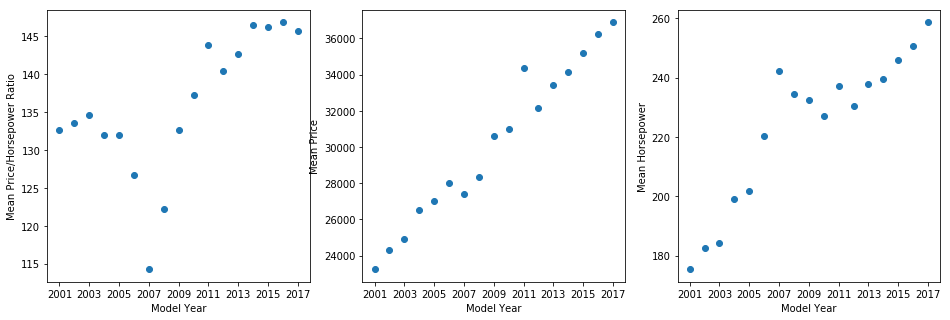

In [148]:
# Plot means by year of numeric variables

plt.figure(figsize = [16, 5])

plt.subplot(1,3,1)
plt.scatter(data=year_means, x='year', y='ppp_mean')
plt.xlabel('Model Year')
plt.ylabel('Mean Price/Horsepower Ratio')
plt.xticks(np.arange(2001, 2019, 2))

plt.subplot(1,3,2)
plt.scatter(data=year_means, x='year', y='price_mean')
plt.xlabel('Model Year')
plt.ylabel('Mean Price')
plt.xticks(np.arange(2001, 2019, 2))

plt.subplot(1,3,3)
plt.scatter(data=year_means, x='year', y='hp_mean')
plt.xlabel('Model Year')
plt.ylabel('Mean Horsepower')
plt.xticks(np.arange(2001, 2019, 2));

C:\Users\rbruton\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\rbruton\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


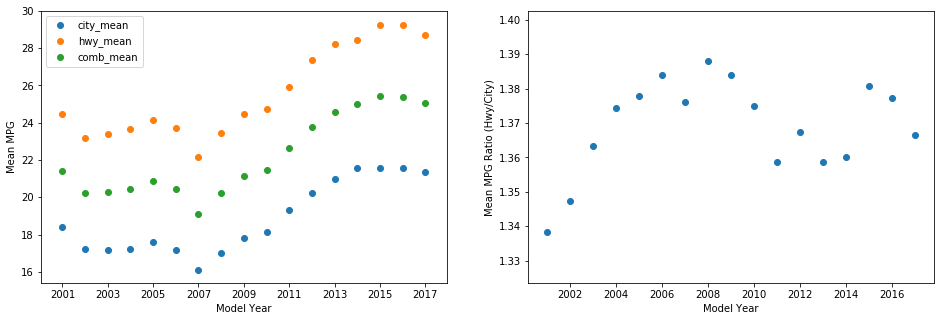

In [149]:
# Make scatter plot of hwy and city mpg means by year

plt.figure(figsize = [16, 5])

plt.subplot(1,2,1)
plt.scatter(data=year_means, x='year', y='city_mean', color='tab:blue')
plt.xlabel('Model Year')
plt.ylabel('Mean MPG')
plt.xticks(np.arange(2001, 2019, 2))

plt.subplot(1,2,1)
plt.scatter(data=year_means, x='year', y='hwy_mean', color='tab:orange')
plt.xlabel('Model Year')
plt.ylabel('Mean MPG')
plt.xticks(np.arange(2001, 2019, 2))

plt.subplot(1,2,1)
plt.scatter(data=year_means, x='year', y='comb_mean', color='tab:green')
plt.xlabel('Model Year')
plt.ylabel('Mean MPG')
plt.xticks(np.arange(2001, 2019, 2))

plt.legend()

plt.subplot(1,2,2)
plt.scatter(data=year_means, x='year', y='mpg_ratio_mean')
plt.xlabel('Model Year')
plt.ylabel('Mean MPG Ratio (Hwy/City)');

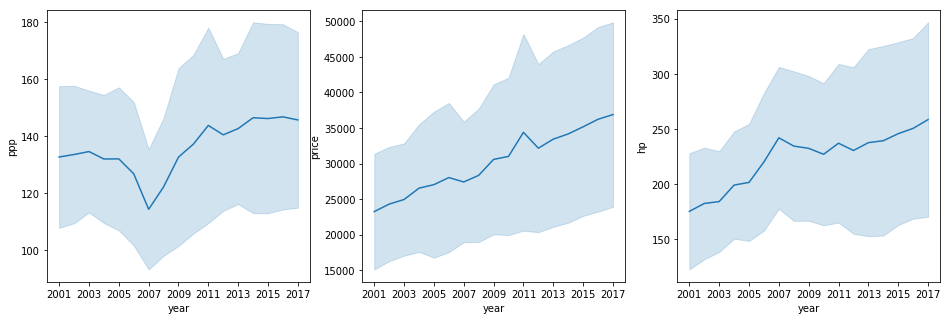

In [150]:
# Make line plots with standard deviation band for means of numeric variables grouped by years

fig, ax = plt.subplots(ncols=3, figsize = [16,5])

sb.lineplot(data=cars, x='year', y='ppp', ci='sd', ax = ax[0])
sb.lineplot(data=cars, x='year', y='price', ci='sd', ax = ax[1])
sb.lineplot(data=cars, x='year', y='hp', ci='sd', ax = ax[2])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(np.arange(2001, 2019, 2));

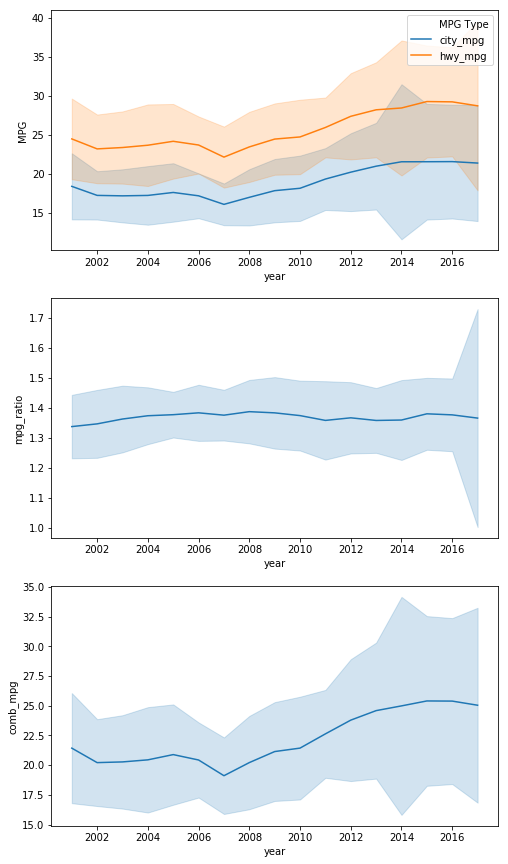

In [151]:
# Melt mpg columns and make line plot of city and hwy mpg vs year with sd band

melted = pd.melt(cars, id_vars='year', value_vars=['city_mpg', 'hwy_mpg']).rename(columns={'variable':'MPG Type', 'value':'MPG'})

fig, ax = plt.subplots(nrows=3, figsize = [8,15])
sb.lineplot(data=melted, x='year', y='MPG', hue='MPG Type', ci='sd', ax = ax[0])

sb.lineplot(data=cars, x='year', y='mpg_ratio', ci='sd', ax = ax[1])

sb.lineplot(data=cars, x='year', y='comb_mpg', ci='sd', ax = ax[2]);

The mean ratio of price per power is fairly consistent across the years with a slight increase overall but a dip over the range 2005 to 2009. The mean price over the range 2001 to 2017 is nearly a perfect linear increase, as is the mean horsepower over the same range except for a slight peak around 2007 (likely causing the dip in price/power around that same time). The mean city and highway gas mileage over years shows an increasing trend overeall, with a slight dip around 2007 (likely also corresponding to the increase in mean horsepower that year as horsepower and fuel economy tend to have an inverse relationship). The mean ratio of highway gas mileage to city gas mileage is nearly constant, with very little fluctuation and almost no overall change over the years. The mean fuel economy ratio also has a very small standard deviation, indicating that this ratio is fairly consistent across the dataset of different vehicles. Since there is an evident correlation between power and fuel economy, it may be interesting to look at the ratio of power to mpg next.

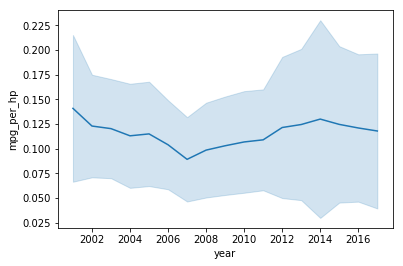

In [152]:
# Make new columns with mpgs/hp and logs

cars['mpg_per_hp'] = cars.comb_mpg / cars.hp

# Lineplot of the ratio comb_mpg/hp by year

sb.lineplot(data=cars, x='year', y='mpg_per_hp', ci='sd');

C:\Users\rbruton\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


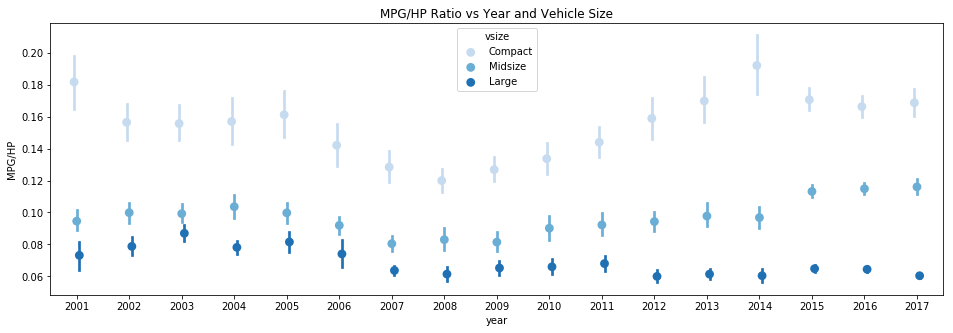

In [153]:
# Point plot of mpg/hp ratio by year and vehicle size

fig = plt.figure(figsize = [16,5])
ax = sb.pointplot(data = cars, x = 'year', y = 'mpg_per_hp', hue = 'vsize',
           palette = 'Blues', linestyles = '', dodge = 0.1)
plt.title('MPG/HP Ratio vs Year and Vehicle Size')
plt.ylabel('MPG/HP');

C:\Users\rbruton\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


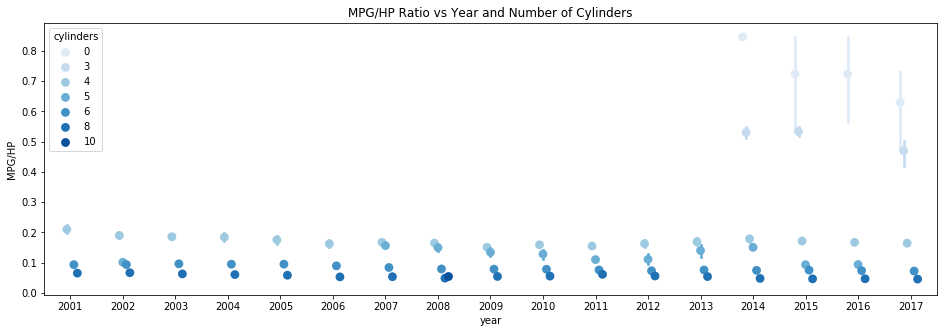

In [154]:
# Point plot of mpg/hp ratio by year and cylinders

fig = plt.figure(figsize = [16,5])
ax = sb.pointplot(data = cars, x = 'year', y = 'mpg_per_hp', hue = 'cylinders',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('MPG/HP Ratio vs Year and Number of Cylinders')
plt.ylabel('MPG/HP');

C:\Users\rbruton\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


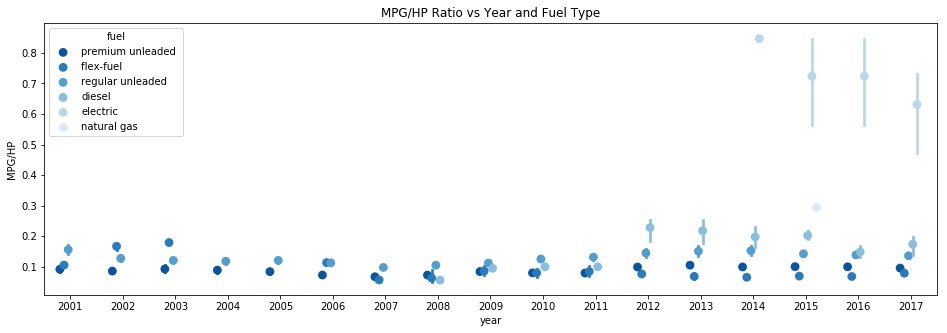

In [155]:
# Point plot of mpg/hp ratio by year and fuel type

fig = plt.figure(figsize = [16,5])
ax = sb.pointplot(data = cars, x = 'year', y = 'mpg_per_hp', hue = 'fuel',
           palette = 'Blues_r', linestyles = '', dodge = 0.4)
plt.title('MPG/HP Ratio vs Year and Fuel Type')
plt.ylabel('MPG/HP');

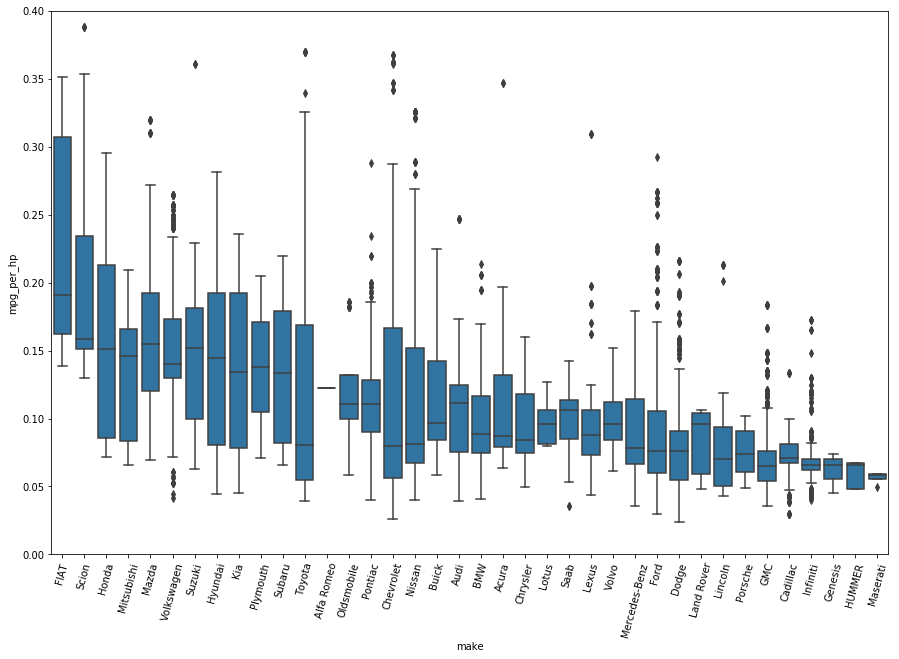

In [156]:
# Box plot of mpg/hp ratio by make sorted by mean

order = cars.groupby('make')['mpg_per_hp'].mean().sort_values(ascending=False).index

plt.figure(figsize = [15, 10])

sb.boxplot(data = cars, x = 'make', y = 'mpg_per_hp', color = default_color, order = order) 
plt.xticks(rotation = 75)
plt.ylim(0, 0.4);

The mean ratio of combined gas mileage per horsepower is fairly consistent across the range of years without any significant overall change. The standard deviation of the ratio appears fairly large compared to the mean, so there must be a lot of variation between vehicles. Plotting this ratio of MPG/HP vs year by vehicle size shows the same overall pattern, but also shows that smaller cars tend to have higher ratios. We also see that the ratio decreases with increasing number of engine cylinders. The mileage per power ratio also seems to be related to the fuel type, the trend being for the ratio to be lowest for flex fuel and then increasing with fuel type in the order of premium unleaded, regular unleaded, diesel, and with electric vehicles having the highest ratio. Looking at the MPG/HP ratio against make shows a lot of variation. Some makes have very wide ranges of the fuel economy to power ratio while quite a few have fairly small ranges. Some of the makes with small ranges tend to have high ratios, but many have very low ratios. In general, American makes and performance/luxury makes tend to have the lowest MPG/HP ratios while the more economical European and Asian makes have higher ratios.

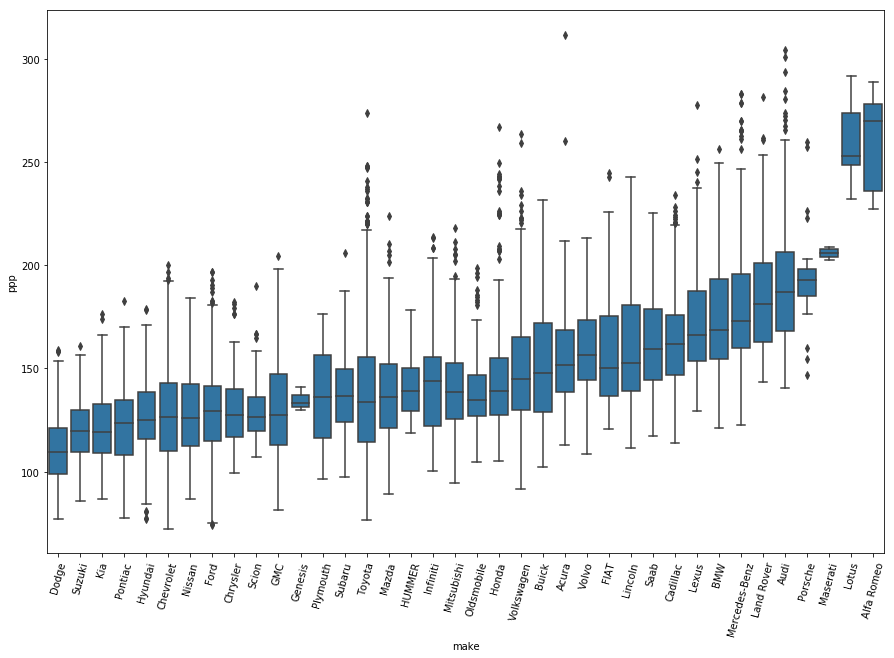

In [157]:
# Box plot of ppp ratio by make sorted by mean

order = cars.groupby('make')['ppp'].mean().sort_values(ascending=True).index

plt.figure(figsize = [15, 10])

sb.boxplot(data = cars, x = 'make', y = 'ppp', color = default_color,  order = order)
plt.xticks(rotation = 75);

The mean ratio of price per power (ppp) varies greatly across vehicle makes. The more luxury/performance/exotic type makes tend to have higher ppp ratios than the more common everyday makes. For most makes, the size of the range is pretty similar although the values of the range vary.

C:\Users\rbruton\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


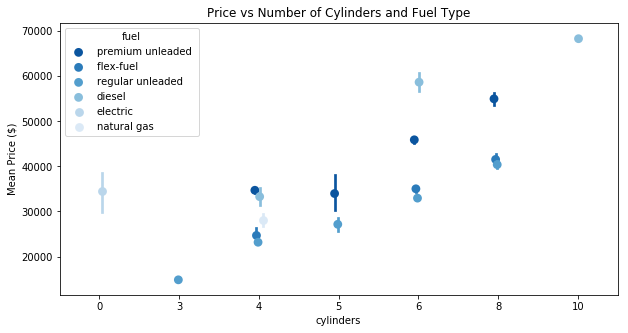

In [158]:
# Point plot of mean price by cylinders and fuel type

fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = cars, x = 'cylinders', y = 'price', hue = 'fuel',
           palette = 'Blues_r', linestyles = '', dodge = 0.1)
plt.title('Price vs Number of Cylinders and Fuel Type')
plt.ylabel('Mean Price ($)');

C:\Users\rbruton\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


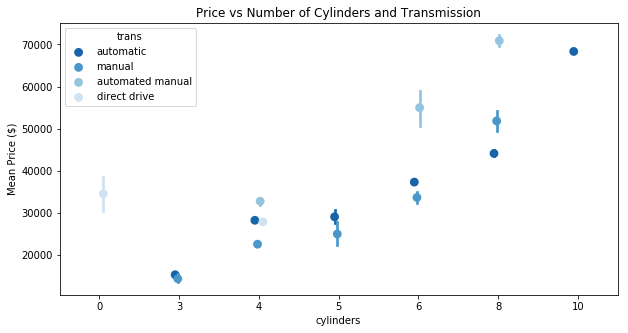

In [159]:
# Point plot of mean price by cylinders and transmission

fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = cars, x = 'cylinders', y = 'price', hue = 'trans',
           palette = 'Blues_r', linestyles = '', dodge = 0.1)
plt.title('Price vs Number of Cylinders and Transmission')
plt.ylabel('Mean Price ($)');

C:\Users\rbruton\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


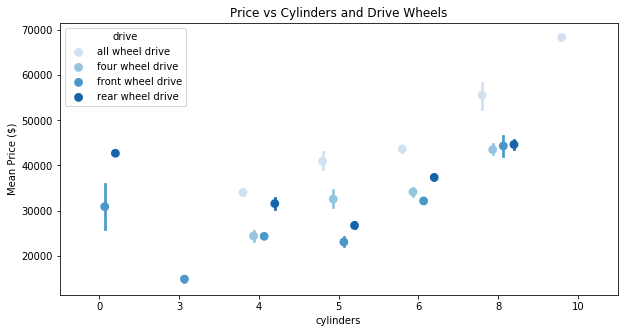

In [160]:
# Point plot of mean price by cylinders and drive

fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = cars, x = 'cylinders', y = 'price', hue = 'drive',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Price vs Cylinders and Drive Wheels')
plt.ylabel('Mean Price ($)');

C:\Users\rbruton\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


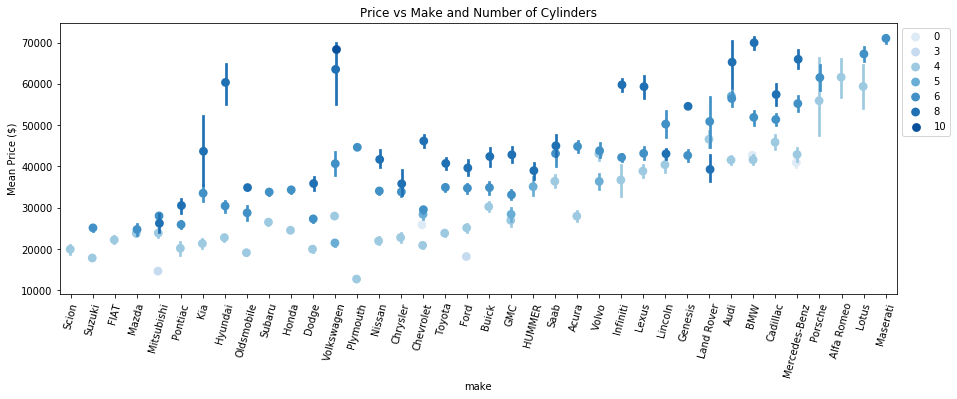

In [161]:
# Point plot of mean price by make and cylinders

order = cars.groupby('make')['price'].mean().sort_values(ascending=True).index

fig = plt.figure(figsize = [15,5])
ax = sb.pointplot(data = cars, x = 'make', y = 'price', hue = 'cylinders',
           palette = 'Blues', linestyles = '', dodge = 0.1, order = order)
plt.title('Price vs Make and Number of Cylinders')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=75)
plt.legend(bbox_to_anchor=(1, 1), loc=2);

Looking at the combinations of number of cylinders with other categorical variables and their effect on price, it seems that if all other variables are held constant, more cylinders means more money. Among vehicles with the same number of engine cylinders, those that run on regular unleaded are cheapest, usually followed closely by flex fuel, then with premium unleaded being more expensive, and diesel usually being most expensive. For 4 and 6 cylinder vehicles, automatic transmissions tend to be more expensive than manuals, however this is reversed with 8 cylinder vehicles. Automated manual transmissions are usually the most expensive. The effect of drive wheels on price is not very clear, except that all wheel drive vehicles tend to be most expensive.

C:\Users\rbruton\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


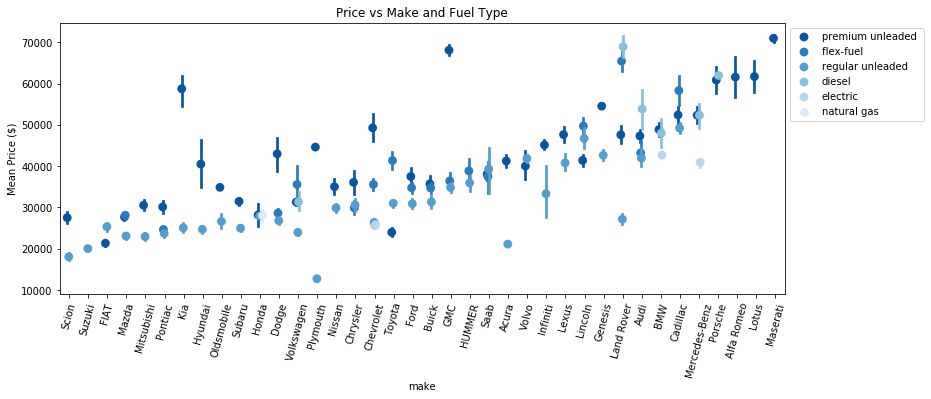

In [162]:
# Point plot of mean price by make and fuel type

order = cars.groupby('make')['price'].mean().sort_values(ascending=True).index

fig = plt.figure(figsize = [13,5])
ax = sb.pointplot(data = cars, x = 'make', y = 'price', hue = 'fuel',
           palette = 'Blues_r', linestyles = '', dodge = 0.2, order = order)
plt.title('Price vs Make and Fuel Type')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=75)
plt.legend(bbox_to_anchor=(1, 1), loc=2);

C:\Users\rbruton\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


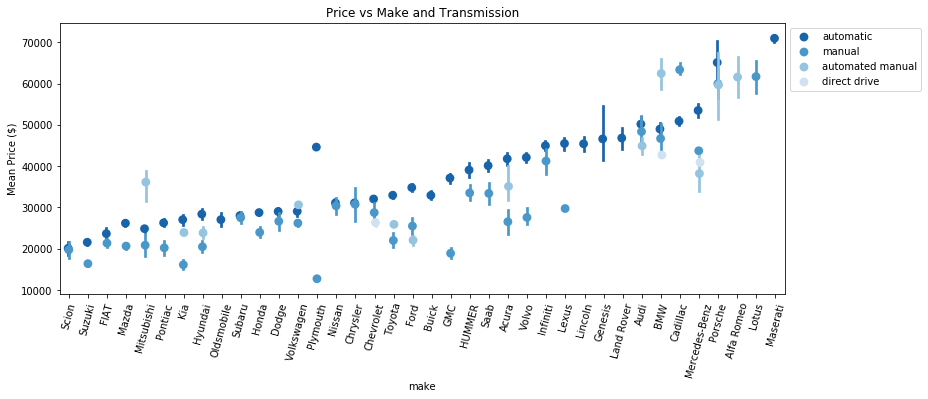

In [163]:
# Point plot of mean price by make and transmission type

order = cars.groupby('make')['price'].mean().sort_values(ascending=True).index

fig = plt.figure(figsize = [13,5])
ax = sb.pointplot(data = cars, x = 'make', y = 'price', hue = 'trans',
           palette = 'Blues_r', linestyles = '', dodge = 0.1, order = order)
plt.title('Price vs Make and Transmission')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=75)
plt.legend(bbox_to_anchor=(1, 1), loc=2);

C:\Users\rbruton\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


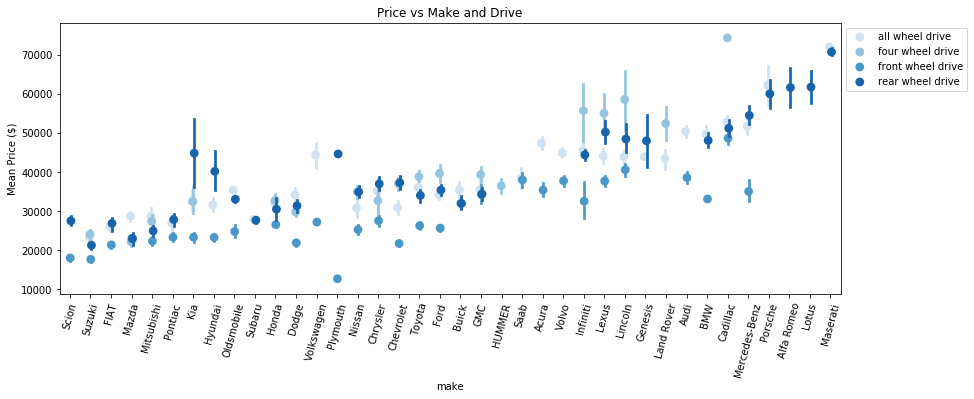

In [164]:
# Point plot of mean price by make and drive

order = cars.groupby('make')['price'].mean().sort_values(ascending=True).index

fig = plt.figure(figsize = [14,5])
ax = sb.pointplot(data = cars, x = 'make', y = 'price', hue = 'drive',
           palette = 'Blues', linestyles = '', dodge = 0.1, order = order)
plt.title('Price vs Make and Drive')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=75)
plt.legend(bbox_to_anchor=(1, 1), loc=2);

C:\Users\rbruton\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


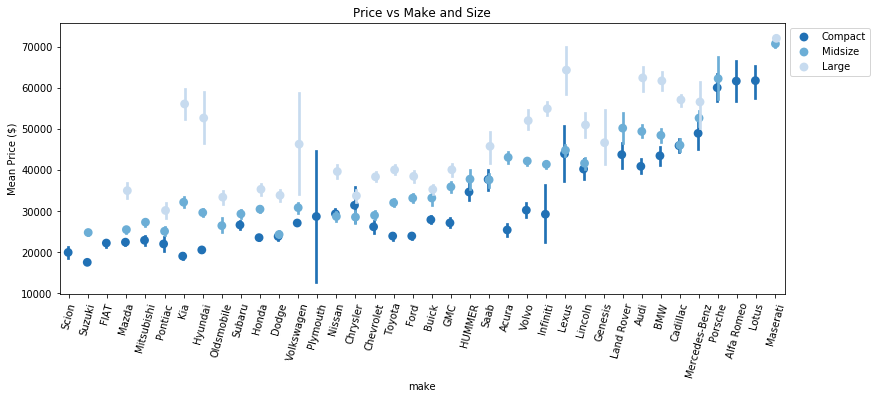

In [165]:
# Point plot of mean price by make and size

order = cars.groupby('make')['price'].mean().sort_values(ascending=True).index

fig = plt.figure(figsize = [13,5])
ax = sb.pointplot(data = cars, x = 'make', y = 'price', hue = 'vsize',
           palette = 'Blues_r', linestyles = '', dodge = 0.1, order = order)
plt.title('Price vs Make and Size')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=75)
plt.legend(bbox_to_anchor=(1, 1), loc=2);

Looking at the mean price by make for the categorical variables, we mostly see similar trends to those already mentioned. Usually, regular fuel vehicles are cheapest, with premium being more and diesel often the most expensive. When sorting by make, we see that manual transmissions are almost always the cheapest as noted before, however, we see that automatics are almost always the most expensive, with automated manuals usually falling in the middle. This observation of transmissions vs price is different than observed earlier when sorting by other features rather than make. This is likely due to the fact that most of the high end cars tend to have automated manual transmissions which skews the mean price of that transmission type. Sorting by make, we see the same trend for drive wheels vs price as before, with front wheel drive being cheapest and rear and all wheel drive being more expensive for the most part. The trend for price vs car size is that the large vehicles are more expensive, which has been noted from previous visualizations as well. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

First, I looked at price vs horsepower by production year. Price and horsepower have a fairly obvious linear correlation that is consistent across the range of years. This led to some feature engineering where I added a column of the ratio between price and horsepower called PPP (price per power). Looking at the mean of this PPP ratio over production years, as well as the mean price and mean horsepower, shows that the PPP ratio is pretty consistent over the years range, with a slight increase overall. The means of horspower and price show a very consistent linear inrease over the years range with similar rates of increase leading to the nearly constant mean ppp. Looking at the highway, city, and the average of these, combined MPG, shows an overall trend of increasing fuel economy over the years. This increase in the fuel economy for different driving conditions is balanced and the mean ratio of highway/city MPG is nearly constant over the year range. Analysis of the fuel economy lead to another engineered feature, the ratio of combined fuel economy to horsepower (MPG/HP). Plotting the mean of this MPG/HP feature vs production year shows a fairly constant ratio. Looking at the MPG/HP over time by categorical variables shows that the MPG/HP is higher for smaller cars with less cylinders and also varies with fuel type, where premium and flex fuel have the lowest ratios. Comparing the MPG/HP with vehicle make shows an interesting trend where many European and Asian makes tend to have higher ratios (more efficient) while American makes, as well as more performance/luxury oriented makes, tend to have lower ratios (less efficient). After looking at these engineered ratio features, I shifted back to looking at some point plots of price vs multiple categorical variables. When grouping by number of cylinders and varying the other categoricals, we see that increases in number of cylinders and increasing vehicle size increase the price. The fuel type and transmission type tend to have a noticeable effect on the price as well with cars runnin on regular unleaded or flex fuel being cheaper while cars running on premium unleaded or diesel are more expensive. Similarly, 4 and 6 cylinder vehicles tend to be cheaper with automatic transmissions and 8 cylinder vehicles tend to be cheapest with manual transmissions, while automated manual transmissions seem to be most expensive for all engine sizes. When plotting price by make and varying the other categorical variables, we see very similar patterns except for the effects of transmission type. When sorting by make, we see that automated manuals are not usually the most expensive transmission type, this difference compared to looking at transmission type for all makes combined is likely due to the more expensive car makes usually having automated manual transmissions which skews the mean price up.


### Were there any interesting or surprising interactions between features?

It was kind of interesting how the relationships between two variables can change when sorting by different third variables, like how the price vs transmission relationship is different depending on if you look at the overall, or if you sort by make, or if you sort by cylinders. It was also interesting to see how consistent the means of the two engineered features, PPP and MPG/HP, were over the range of years. Also, how the highway/city MPG ratio was nearly constant. The lineplots sorted by make were also interesting as they give a better picture of what the effect of the other variables have on price since prices vary so much depending on the make.

In [167]:
cars.to_csv('cars_final.csv')